<a href="https://colab.research.google.com/github/XuRui314/MathematicalModeling/blob/main/2021C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# preparation
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir("/content/drive/MyDrive/dataset/MathModel/2021C")
!ls

 result1.svg    供货C.xlsx  '附件1 近5年402家供应商的相关数据.xlsx'
'SimHei .ttf'   订货A.xlsx  '附件2 近5年8家转运商的相关数据.xlsx'
 供货A.xlsx     订货B.xlsx  '附件A 订购方案数据结果.xlsx'
 供货B.xlsx     订货C.xlsx  '附件B 转运方案数据结果.xlsx'


# 前言
这个就是用来学遗传算法的，复现了一下国奖论文。

# 第一问

## 数据处理

根据论文，需要预处理得到的有：供货次数、供货总量、平均供货量和平均差值。

首先来得到各种原材料的数组数据：

In [3]:
import numpy as np
import pandas as pd
import math

data=pd.DataFrame(pd.read_excel("附件1 近5年402家供应商的相关数据.xlsx", sheet_name=0))

data1=pd.DataFrame(pd.read_excel("附件1 近5年402家供应商的相关数据.xlsx",sheet_name=1))

data=data.drop([14,33,46,95,96,117,136,152,157,159,160,161,163,172,182,199,200,214,221,227,230,245,276,284,292,301,333,334,342,353,368,379,395],axis=0)
data1=data1.drop([14,33,46,95,96,117,136,152,157,159,160,161,163,172,182,199,200,214,221,227,230,245,276,284,292,301,333,334,342,353,368,379,395],axis=0)


data_a = data.loc[data["材料分类"] == "A"].reset_index(drop=True)
data_b = data.loc[data["材料分类"] == "B"].reset_index(drop=True)
data_c = data.loc[data["材料分类"] == "C"].reset_index(drop=True)

data1_a = data1.loc[data1["材料分类"] == "A"].reset_index(drop=True)
data1_b = data1.loc[data1["材料分类"] == "B"].reset_index(drop=True)
data1_c = data1.loc[data1["材料分类"] == "C"].reset_index(drop=True)

data_a.to_excel("订货A.xlsx")

data_b.to_excel("订货B.xlsx")

data_c.to_excel("订货C.xlsx")

data1_a.to_excel("供货A.xlsx")

data1_b.to_excel("供货B.xlsx")

data1_c.to_excel("供货C.xlsx")

num_a=(data1_a == 0).astype(int).sum(axis=1)

num_b=(data1_b == 0).astype(int).sum(axis=1)

num_c=(data1_c == 0).astype(int).sum(axis=1)

num_a = (240-np.array(num_a)).tolist()
num_b = (240-np.array(num_b)).tolist()
num_c = (240-np.array(num_c)).tolist()

total_a=data1_a.sum(axis=1).to_list()

total_b=data1_b.sum(axis=1).to_list()

total_c=data1_c.sum(axis=1).to_list()

#平均供货量

a=[]

b=[]

c=[]

for i in range(len(total_a)):
  a.append(total_a[i]/num_a[i])

for i in range(len(total_b)):
  b.append(total_b[i]/num_b[i])

for i in range(len(total_c)):
  c.append(total_c[i]/num_c[i])

data_a = pd.DataFrame(pd.read_excel("供货A.xlsx"))

data_b = pd.DataFrame(pd.read_excel("供货B.xlsx"))

data_c = pd.DataFrame(pd.read_excel("供货C.xlsx"))

a=np.array(data_a)
print(a)

a=np.delete(a, [0,1,2], axis=1)
print(a)

b=np.array(data_b)

b=np.delete(b, [0,1,2], axis=1)

c=np.array(data_c)

c=np.delete(c, [0,1,2], axis=1)

a1=a.tolist()

b1=b.tolist()

c1=c.tolist()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


[[0 'S002' 'A' ... 0 0 1]
 [1 'S005' 'A' ... 74 76 81]
 [2 'S007' 'A' ... 19 21 17]
 ...
 [133 'S381' 'A' ... 0 0 0]
 [134 'S394' 'A' ... 0 0 0]
 [135 'S395' 'A' ... 0 0 0]]
[[1 0 0 ... 0 0 1]
 [37 62 60 ... 74 76 81]
 [9 94 37 ... 19 21 17]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [945 0 0 ... 0 0 0]]


In [4]:
a.sum(axis = 1)

array([273, 6912, 6948, 29, 28, 37, 138, 80, 140, 28, 81, 162, 144, 36,
       138, 39, 197, 38, 29, 54, 77, 28, 75, 397, 189, 388, 191, 28, 390,
       8553, 58, 28, 64, 141, 73, 36, 60, 56, 131, 155, 77, 36, 10931,
       398, 75, 29, 137, 73, 6449, 158, 133, 60, 63, 82787, 28, 63, 59,
       1806, 398, 7634, 40, 28, 395, 215, 252, 75, 136, 135, 163, 36, 73,
       64, 74, 8892, 36, 40, 54, 36, 81, 60, 8757, 163, 58, 139, 36, 392,
       200, 254, 354887, 328, 79, 63, 35, 36, 161, 36, 141, 6519, 211,
       9484, 77, 158553, 62, 36, 169340, 30, 30, 40, 7984, 9160, 56, 62,
       62, 299, 156, 78196, 37, 77, 29, 346, 29, 156518, 305, 144, 36, 63,
       92421, 39, 89031, 56, 58, 29, 30, 201, 144, 75843], dtype=object)

In [5]:
a[5]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0,
       7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 5, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 3, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=object)

需要的统计量有：供货总量`[np.sum(axis=1)]`，平均供货量（供货总量/供货计数）`[out2]`，稳定性(累加（供货量-订单量）^2)，供货极差`[max-min]`，满足比例(在20%误差内)，连续性

连续性这个指标可以由间隔次数、平均间隔周数和平均连续供货周数来综合平均，这里根据论文的权重来设置。



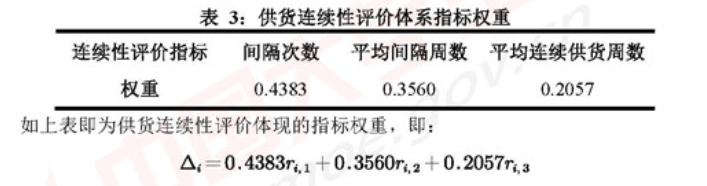

### 连续性

In [6]:
# tem1数组的元素是[[[0,0,0],[0,0]], [[0,0],[0,0,0,0,0]]]这样的，记录每次不供货的情况
def count(a1):
  tem1=[]
  for j in range(len(a1)):
    tem=[]
    z=[]
    for i in range(len(a1[j])):
      if a1[j][i] != 0:
        tem.append(z)
        z=[]

      else:
        z.append(a1[j][i])

    tem.append(z)
    list1 = [x for x in tem if x != []]
    tem1.append(list1)
  return tem1

# 统计平均间隔天数
def out2(tem1):
  tem = []
  for i in range(len(tem1)):
    if len(tem1[i]) == 0 :
      tem.append(0)
    else:
      a=0
      for j in range(len(tem1[i])):
        a=a+len(tem1[i][j])
      tem.append(a/len(tem1[i]))
  return tem

# 统计间隔个数
def out1(tem1):
  tem = []
  for i in range(len(tem1)):
    if len(tem1[i]) == 0 :
      tem.append(0)
    else:
      tem.append(len(tem1[i]))
  return tem

# 连续供货周数
def count2(a1):
  tem1=[]
  for j in range(len(a1)):
    tem=[]
    z=[]
    for i in range(len(a1[j])):
      if a1[j][i] == 0:
        tem.append(z)
        z=[]

      else:
        z.append(a1[j][i])

    tem.append(z)
    list1 = [x for x in tem if x != []]
    tem1.append(list1)
  return tem1
 

In [7]:
# A供货间隔次数
tem1 = count(a1)

tem = out1(tem1)

print(tem)

# A平均供货间隔次数
tem = out2(tem1)

print(tem)

# A平均连续供货天数
tem2 = count2(a1)

tem = out2(tem2)
print(tem)

[45, 6, 0, 9, 12, 15, 16, 26, 12, 13, 18, 17, 43, 18, 14, 15, 66, 17, 11, 19, 22, 13, 4, 108, 46, 100, 13, 14, 105, 31, 20, 11, 22, 16, 20, 8, 20, 16, 27, 19, 26, 15, 11, 107, 12, 6, 16, 21, 0, 14, 22, 19, 23, 0, 3, 21, 23, 0, 103, 2, 14, 13, 103, 23, 23, 38, 14, 15, 22, 11, 21, 19, 20, 10, 12, 17, 19, 21, 5, 21, 7, 24, 40, 11, 21, 102, 22, 20, 0, 105, 18, 22, 8, 6, 15, 15, 43, 0, 55, 4, 24, 0, 19, 10, 0, 11, 12, 11, 19, 85, 42, 22, 47, 6, 44, 22, 15, 24, 21, 47, 11, 0, 20, 18, 16, 20, 16, 16, 0, 15, 20, 9, 11, 19, 11, 31]
[3.7555555555555555, 22.166666666666668, 0, 25.333333333333332, 18.666666666666668, 14.866666666666667, 13.4375, 7.615384615384615, 18.666666666666668, 17.384615384615383, 11.666666666666666, 12.470588235294118, 4.3023255813953485, 12.11111111111111, 15.357142857142858, 14.8, 1.5151515151515151, 13.0, 20.454545454545453, 11.31578947368421, 9.5, 17.153846153846153, 58.75, 1.0555555555555556, 3.8260869565217392, 1.08, 17.53846153846154, 15.928571428571429, 1.0952380952

In [8]:
# A供货总次数
(a != 0).sum(axis = 1)

array([ 71, 107, 240,  12,  16,  17,  25,  42,  16,  14,  30,  28,  55,
        22,  25,  18, 140,  19,  15,  25,  31,  17,   5, 126,  64, 132,
        12,  17, 125, 101,  27,  14,  27,  25,  29,  12,  25,  25,  50,
        25,  37,  19, 229, 121,  23,   9,  26,  31, 240,  24,  51,  28,
        28, 240,   3,  28,  27, 240, 124,  77,  19,  16, 120,  47,  46,
        63,  28,  24,  45,  16,  26,  26,  26, 151,  17,  20,  22,  23,
         5,  30,  90,  37,  54,  20,  25, 123,  34,  30, 240, 119,  29,
        27,  12,   6,  26,  18,  59, 240, 143,  90,  32, 240,  26,  15,
       240,  14,  13,  14, 219,  90,  56,  33,  62,   8,  88, 171,  18,
        32,  21,  99,  12, 240,  46,  31,  22,  27, 194,  20, 240,  19,
        25,  10,  15,  28,  10,  74])

### 各项指标

对于删除33个质量极低的供应商，获得供货次数、供货总量、平均供货量和平均差值。

In [9]:
# 订货量
dd2 = data.drop(['供应商ID','材料分类'], axis=1)
# 供货量
dd1 = data1.drop(['供应商ID','材料分类'], axis=1)
average = dd1.values.sum(axis=1) / ( (dd1.values != 0).sum(axis = 1) )

In [10]:
# 供货极差
dmax = np.max(dd1.values,axis=1) 
dmin = np.min(dd1.values,axis=1)

ex = dmax - dmin

In [11]:
d1 = np.sum(dd1.values,axis=1)
d2 = np.sum(dd2.values,axis=1)

stability = (d1 - d2)**2
stability.shape

(369,)

In [12]:
# 合理供货比例
low = dd2.values * 0.8
high = dd2.values * 1.2

# reasonable data
dv = dd1.values
rd = []
counts = 0
for i in range(len(dv)):
  counts = 0
  for j in range(len(dv[i])):
    if dv[i][j] >= low[i][j] and dv[i][j] <= high[i][j] and dd2.values[i][j] != 0:
      counts+=1
  rd.append(counts)

rdr = rd / (dv != 0).sum(axis = 1)

In [13]:
continuous = dv.tolist()

# 供货间隔次数
tem1 = count(continuous)

c1 = out1(tem1)

# 平均供货间隔次数
c2 = out2(tem1)

# 平均连续间隔次数
tem2 = count2(continuous)

c3 = out2(tem2)

制作新表格：

In [14]:
new_d = pd.DataFrame({'供货总量':dv.sum(axis=1),'平均供货量':average,'稳定性':stability,'供货极差':ex,'满足比例':rdr,'间隔个数':c1,'平均间隔天数':c2,'平均连续供货天数':c3})

In [15]:
new_d['材料分类'] = data1['材料分类'].values

In [16]:
new_d.index = data1['供应商ID']

In [17]:
new_d['供应商ID']=new_d.index

In [18]:
new_d

供货总量      平均供货量      稳定性  供货极差      满足比例  间隔个数     平均间隔天数   平均连续供货天数  \
供应商ID                                                                          
S001      49   1.960000    33124     6  0.400000    21  10.238095   1.250000   
S002     273   3.845070     1296    67  0.535211    45   3.755556   1.543478   
S003   13138  68.785340  1301881   387  0.753927    15   3.266667  11.937500   
S004      64   1.939394   421201     8  0.363636    21   9.857143   1.650000   
S005    6912  64.598131   139876   128  0.859813     6  22.166667  15.285714   
...      ...        ...      ...   ...       ...   ...        ...        ...   
S398      41   2.562500    24964     5  0.625000    13  17.230769   1.333333   
S399      65   2.166667    48841     5  0.300000    21  10.000000   1.500000   
S400      53   4.076923   567009    16  0.230769     8  28.375000   1.857143   
S401      67   2.310345    17689     8  0.482759    21  10.047619   1.450000   
S402      35   4.375000   851929    20  0.375000     7  33.142857   1.333333   

      材料分类 供应商ID  
供应商ID             
S001     B  S001  
S002     A  S002  
S003     C  S003  
S004     B  S004  
S005     A  S005  
...    ...   ...  
S398     C  S398  
S399     B  S399  
S400     B  S400  
S401     B  S401  
S402     B  S402  

[369 rows x 10 columns]

## Topsis

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn import preprocessing


def entropyWeight(data):
	data = np.array(data)
	# 归一化
	P = data / data.sum(axis=0)

	# 计算熵值
	E = np.nansum(-P * np.log(P) / np.log(len(data)), axis=0)

	# 计算权系数
	return (1 - E) / (1 - E).sum()

tdata = new_d[['间隔个数','平均间隔天数','平均连续供货天数']].values
# beta=[]
# min_max_scaler = preprocessing.MinMaxScaler()
# x_minMax = min_max_scaler.fit_transform(tdata)
# entropyWeight(x_minMax)
beta = entropyWeight(tdata)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in multiply
  


In [20]:
beta # 这个权值和论文差很多，挺离谱的就是，实际上这玩意主观赋权都行:)

array([0.1590042 , 0.16641352, 0.67458228])

In [21]:
new_d["平均连续供货天数"].values

array([  1.25      ,   1.54347826,  11.9375    ,   1.65      ,
        15.28571429,   1.3       , 240.        ,   1.        ,
         1.46153846,   2.        ,   1.6       ,   1.5       ,
         1.25      ,   1.45454545,   1.21428571,   1.66666667,
         1.47619048,   1.33333333,   1.375     ,   1.68      ,
         1.45454545,   1.26666667,   2.25      ,   1.29896907,
         1.16666667,   1.76470588,   1.9       ,   1.45      ,
         1.75      , 240.        ,   1.57894737,   1.41666667,
         1.27906977,   2.04166667,   9.8125    ,   1.29411765,
         2.25      , 240.        ,   1.55555556,   1.92307692,
         1.28571429,   2.        ,   1.42857143,   2.08955224,
         1.625     ,   1.1875    ,   1.52631579,   1.5       ,
         1.38888889,   1.47619048,   2.8974359 , 240.        ,
         1.41666667,   1.22222222,   1.25      ,   1.34285714,
         1.        ,   1.36363636,   1.66666667,   1.5       ,
         1.16666667,   1.42222222,   1.32      ,   3.18

In [22]:
new_d["平均间隔天数"].values

array([ 10.23809524,   3.75555556,   3.26666667,   9.85714286,
        22.16666667,  20.63636364,   0.        ,  14.0625    ,
        15.78571429,  12.23529412,   9.9047619 ,  25.33333333,
        12.94117647,  18.66666667,  14.86666667,  13.4375    ,
         9.5       ,  22.8       ,   8.28      ,   7.61538462,
        18.66666667,   1.01904762,   9.28571429,   1.16326531,
        17.38461538,  11.66666667,  22.1       ,  10.04761905,
        12.47058824,   0.        ,  10.5       ,  17.15384615,
         4.30232558,   7.64      ,   4.88235294,  12.11111111,
         9.28571429,   0.        ,  11.15789474,  15.35714286,
        14.8       ,  28.25      ,  14.66666667,   1.51515152,
        12.58823529,  13.        ,  10.55      ,  20.45454545,
        11.31578947,   9.5       ,   3.34210526,   0.        ,
        17.15384615,  11.47368421,  12.94117647,   5.36111111,
        20.90909091,   9.13043478,  58.75      ,  14.6       ,
         1.05555556,   3.82608696,   1.08      ,   1.33

In [23]:
evaluate = new_d.drop(['间隔个数','平均间隔天数','平均连续供货天数'],axis = 1)
evaluate.index = new_d.index

In [24]:
#topsis
def topsis(data1, weight=None):
  # 归一化
  t = np.array(data1[["供货总量","平均供货量","稳定性","供货极差","满足比例"]]).reshape(369,5)
  min_max_scaler = preprocessing.MinMaxScaler()

  # 先正向化再去scale，这里我没有正向化，实际是要做的
  data = pd.DataFrame(min_max_scaler.fit_transform(t))
  data = data / np.sqrt((data ** 2).sum())


	# 最优最劣方案
  Z = pd.DataFrame([data.min(), data.max()], index=['负理想解', '正理想解'])

	# 距离
  weight = entropyWeight(data) if weight is None else np.array(weight)
  Result = data.copy()
  Result['正理想解'] = np.sqrt(((data - Z.loc['正理想解']) ** 2 * weight).sum(axis=1)) # 用loc取行
  Result['负理想解'] = np.sqrt(((data - Z.loc['负理想解']) ** 2 * weight).sum(axis=1))  
  # 综合得分指数
  Result['综合得分指数'] = Result['负理想解'] / (Result['负理想解'] + Result['正理想解'])
  Result['排序'] = Result.rank(ascending=False)['综合得分指数'] 
  return Result, Z, weight  

def entropyweight(data):

  data = np.array(data[["供货总量","平均供货量","稳定性","供货极差","满足比例"]])
  #归一化
  P = data / data.sum(axis=0)
  # 计算篇值
  E = np.nansum(-P * np.log(P)/ np.log(len(data)), axis=0)
  # 计算权系数
  return (1 - E) / (1 - E).sum()

tdata = evaluate
Result, z, weight = topsis(tdata, weight=None)
Result.index = tdata.index
print(weight)
Result.sort_values(by = ['排序'])[0:50]

[0.20434769 0.18326723 0.36144019 0.24465574 0.00628915]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in multiply
  


0         1             2         3         4      正理想解  \
供应商ID                                                                   
S140   0.354366  0.362350  9.457807e-01  0.354925  0.044605  0.132800   
S348   0.108407  0.124988  1.645562e-01  0.616284  0.072990  0.502692   
S151   0.228176  0.212804  1.529757e-01  0.352057  0.087380  0.507104   
S229   0.416364  0.388506  7.368943e-04  0.043957  0.088500  0.634779   
S126   0.055747  0.137088  2.118560e-01  0.251924  0.064014  0.515103   
S361   0.384911  0.359140  8.513041e-04  0.039706  0.088126  0.635941   
S374   0.057723  0.053661  1.101273e-05  0.394948  0.049291  0.618166   
S108   0.282679  0.263691  2.743279e-02  0.124470  0.087753  0.608695   
S139   0.178150  0.179586  1.976708e-02  0.170128  0.048040  0.615013   
S395   0.088955  0.269198  2.583394e-02  0.127688  0.083565  0.623544   
S308   0.160710  0.149815  7.163976e-02  0.135439  0.086259  0.597118   
S330   0.160304  0.149436  3.893101e-02  0.161843  0.087753  0.609621   
S340   0.201105  0.187529  9.719333e-06  0.018970  0.089247  0.653806   
S282   0.198658  0.185244  1.930678e-05  0.028688  0.089247  0.651939   
S275   0.186001  0.173427  4.790963e-06  0.009618  0.089620  0.657777   
S329   0.183613  0.171198  8.325901e-07  0.013219  0.089620  0.657275   
S307   0.091716  0.119964  1.669137e-02  0.156426  0.051361  0.631267   
S131   0.161313  0.150378  1.030460e-04  0.016853  0.087380  0.659418   
S356   0.152859  0.142485  1.567309e-04  0.028871  0.088500  0.657953   
S268   0.152248  0.141914  5.105042e-06  0.007968  0.089620  0.662751   
S306   0.147918  0.137872  5.105042e-06  0.011018  0.089620  0.662701   
S194   0.118901  0.110780  6.637358e-09  0.007518  0.088500  0.667978   
S037   0.059438  0.084616  8.516293e-03  0.089965  0.062220  0.654406   
S352   0.104429  0.097268  2.134604e-06  0.010302  0.088873  0.669759   
S143   0.097103  0.090428  4.095665e-03  0.041790  0.082525  0.662098   
S247   0.066492  0.061848  1.437221e-05  0.003851  0.089620  0.677962   
S284   0.054640  0.050783  3.453562e-05  0.033305  0.088873  0.673851   
S365   0.048814  0.045343  1.328182e-05  0.004934  0.089247  0.681122   
S031   0.048316  0.044878  1.257880e-05  0.004084  0.088873  0.681407   
S338   0.035295  0.038541  1.917812e-03  0.034672  0.039099  0.675940   
S040   0.037402  0.034688  6.107106e-06  0.006234  0.088126  0.683114   
S364   0.033715  0.031246  2.102980e-06  0.009452  0.088873  0.683164   
S210   0.018381  0.034705  1.054751e-02  0.017219  0.060759  0.677681   
S055   0.028175  0.026073  1.942150e-03  0.019820  0.082152  0.681095   
S367   0.030867  0.028586  5.023816e-05  0.009335  0.083272  0.683748   
S157   0.000431  0.000603  3.190906e-02  0.000117  0.025392  0.676536   
S346   0.027235  0.025196  6.374518e-05  0.001717  0.088126  0.686151   
S086   0.021027  0.022645  4.380615e-03  0.021070  0.040895  0.680794   
S074   0.015280  0.019803  1.131745e-02  0.017370  0.048741  0.679097   
S294   0.022075  0.020378  1.101273e-05  0.001850  0.089620  0.687219   
S273   0.011095  0.027442  4.713102e-05  0.008935  0.079662  0.686279   
S080   0.022538  0.020811  3.759665e-06  0.003351  0.069829  0.686800   
S292   0.010715  0.026496  1.067170e-04  0.004601  0.077671  0.687328   
S208   0.010242  0.025319  1.108856e-03  0.009852  0.063730  0.685863   
S154   0.008924  0.025803  1.978847e-04  0.006534  0.070998  0.687146   
S244   0.019217  0.017709  1.044351e-05  0.002850  0.075804  0.687601   
S218   0.018134  0.016698  1.628510e-05  0.002684  0.072816  0.687863   
S078   0.010003  0.022001  7.401556e-05  0.006851  0.070986  0.687378   
S003   0.015382  0.017822  3.840467e-05  0.006434  0.067567  0.687252   
S114   0.012793  0.012287  3.934361e-04  0.012002  0.048919  0.686738   

           负理想解    综合得分指数    排序  
供应商ID                            
S140   0.635503  0.827152   1.0  
S348   0.328644  0.395321   2.0  
S151   0.240351  0.321559   3.0  
S229   0.252209  0.284343   4.0  
S126   0.1893

差不多第一问就是这样的，和论文结果大差不差，主要是看第二问的遗传算法。

# 第二问

In [25]:
!wget -O /usr/share/fonts/truetype/liberation/simhei.ttf "https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf"
import matplotlib.pyplot as plt
import matplotlib as mpl
zhfont = mpl.font_manager.FontProperties(fname='/usr/share/fonts/truetype/liberation/simhei.ttf')
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
!gdown --id 1fsKERl26TNTFIY25PhReoCujxwJvfyHn

--2022-08-22 07:00:30--  https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf
Resolving www.wfonts.com (www.wfonts.com)... 104.225.219.210
Connecting to www.wfonts.com (www.wfonts.com)|104.225.219.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10050870 (9.6M) [application/octetstream]
Saving to: ‘/usr/share/fonts/truetype/liberation/simhei.ttf’

/usr/share/fonts/tr 100%[===================>]   9.58M  27.1MB/s    in 0.4s    

2022-08-22 07:00:30 (27.1 MB/s) - ‘/usr/share/fonts/truetype/liberation/simhei.ttf’ saved [10050870/10050870]

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1fsKERl26TNTFIY25PhReoCujxwJvfyHn
To: /content/drive/MyDrive/dataset/MathModel/2021C/SimHei .ttf
100% 10.1M/10.1M [00:00<00:00, 42.8

### 供货商的选择

In [26]:
data1.index = [i for i in range(369)]

In [27]:
# 问题一求得的50家
select_supliers_50 = [
    'S140',
    "S229",
    "S361",
    "S348",
    "S151",
    "S108",
    "S395",
    "S374",
    "S139",
    "S340",

    "S282",
    "S330",
    "S308",
    "S275",
    "S329",
    "S126",
    "S131",
    "S356",
    "S268",
    "S306",

    "S307",
    "S194",
    "S352",
    "S143",
    "S247",
    "S037",
    "S284",
    "S365",
    "S031",
    "S040",

    "S364",
    "S346",
    "S367",
    "S294",
    "S055",
    "S338",
    "S244",
    "S080",
    "S218",
    "S003",

    "S189",
    "S086",
    "S210",
    "S114",
    "S074",
    "S007",
    "S123",
    "S273",
    "S291",
    "S292"]

In [28]:
new_dd = new_d.loc[select_supliers_50]
new_dd 

供货总量        平均供货量          稳定性   供货极差      满足比例  间隔个数     平均间隔天数  \
供应商ID                                                                       
S140   302047  1379.210046  32061051136  21293  0.497717    17   1.235294   
S229   354887  1478.695833     24980004   2638  0.987500     0   0.000000   
S361   328080  1367.000000     28858384   2383  0.983333     0   0.000000   
S348    92421   476.396907   5578297344  36972  0.814433    16   2.875000   
S151   194498   810.408333   5185728144  21121  0.975000     0   0.000000   
S108   240950  1003.958333    929945025   7468  0.979167     0   0.000000   
S395    75843  1024.905405    875745649   7661  0.932432    31   5.354839   
S374    49224   205.100000       373321  23694  0.550000     0   0.000000   
S139   151862   684.063063    670084996  10207  0.536036    18   1.000000   
S340   171426   714.275000       329476   1139  0.995833     0   0.000000   
S282   169340   705.583333       654481   1722  0.995833     0   0.000000   
S330   136652   569.383333   1319723584   9710  0.979167     0   0.000000   
S308   136998   570.825000   2428518400   8126  0.962500     0   0.000000   
S275   158553   660.637500       162409    578  1.000000     0   0.000000   
S329   156518   652.158333        28224    794  1.000000     0   0.000000   
S126    47540   522.417582   7181715025  15114  0.714286    21   7.095238   
S131   137512   572.966667      3493161   1012  0.975000     0   0.000000   
S356   130307   542.945833      5313025   1733  0.987500     0   0.000000   
S268   129786   540.775000       173056    479  1.000000     0   0.000000   
S306   126096   525.400000       173056    662  1.000000     0   0.000000   
S307    78196   457.286550    565821369   9385  0.573099    22   3.136364   
S194   101365   422.354167          225    452  0.987500     0   0.000000   
S352    89031   370.962500        72361    619  0.991667     0   0.000000   
S143    82787   344.945833    138839089   2508  0.920833     0   0.000000   
S247    56698   236.241667       487204    232  1.000000     0   0.000000   
S037    50686   322.840764    288694081   5398  0.694268    17   4.882353   
S284    46597   194.154167      1170724   1999  0.991667     0   0.000000   
S365    41631   173.462500       450241    297  0.995833     0   0.000000   
S031    41207   171.695833       426409    246  0.991667     0   0.000000   
S040    31905   132.937500       207025    375  0.983333     0   0.000000   
S364    28763   119.845833        71289    568  0.991667     0   0.000000   
S346    23240    96.833333      2160900    104  0.983333     0   0.000000   
S367    26335   109.729167      1703025    561  0.929167     0   0.000000   
S294    18842    78.508333       373321    112  1.000000     0   0.000000   
S055    24041   100.170833     65836996   1190  0.916667     0   0.000000   
S338    30109   147.593137     65011969   2081  0.436275    25   1.440000   
S244    16406    68.358333       354025    172  0.845833     0   0.000000   
S080    19237    80.154167       127449    202  0.779167     0   0.000000   
S218    15483    64.512500       552049    162  0.812500     0   0.000000   
S003    13138    68.785340      1301881    387  0.753927    15   3.266667   
S189     8892    58.887417        38025    116  0.874172    10   8.900000   
S086    17949    87.131068    148498596   1265  0.456311    24   1.416667   
S210    15694   133.000000    357550281   1034  0.677966    54   2.259259   
S114    10931    47.733624     13337104    721  0.545852    11   1.000000   
S074    13051    76.321637    383650569   1043  0.543860    69   1.000000   
S007     6948    28.950000        53824    146  0.412500     0   0.000000   
S123     6449    26.870833       114921    113  0.566667     0   0.000000   
S273     9484   105.377778      1597696    537  0.888889     4  37.500000   
S291     7984    36.456621     30052324    686  0.538813    19   1.105263   
S292     9160   101.777778      3617604    277  0.866667    85   1.764706   

    

In [29]:
material_type = new_dd['材料分类'].values

In [30]:
pip install geatpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.9 MB 6.8 MB/s 


In [31]:
pip install gpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 959 kB 7.8 MB/s 
     |████████████████████████████████| 71 kB 11.0 MB/s 
  Created wheel for gpy: filename=GPy-1.10.0-cp37-cp37m-linux_x86_64.whl size=2565142 sha256=beb5cfcb705a6a11a38029c7da8b11646fb6fedf3628975e13920d9a9b1cbd5e
  Stored in directory: /root/.cache/pip/wheels/f7/18/28/dd1ce0192a81b71a3b086fd952511d088b21e8359ea496860a
  Created wheel for paramz: filename=paramz-0.9.5-py3-none-any.whl size=102566 sha256=9093abc5ff82d3ce54d177bb07b27561d0b57c2f2c9e0118bd25136e0250e883
  Stored in directory: /root/.cache/pip/wheels/c8/95/f5/ce28482da28162e6028c4b3a32c41d147395825b3cd62bc810
Successfully built gpy paramz


In [32]:
# 供应货能力（高斯过程拟合)
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import MultipleLocator
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.font_manager import fontManager

# 改style要在改font之前
plt.style.use('seaborn')  

fontManager.addfont('SimHei .ttf')
mpl.rc('font', family='SimHei')

遗传算法介绍

遗传算法就是把变量的值当成表现型，假设有一种隐式的变量也就是染色体来生成，然后按照生物学的规则去启发式地设计。

具体的教材可以看这个：
- https://zhuanlan.zhihu.com/p/51587062

In [ ]:
# 遗传算法模板
# -*-coding:utf-8-*-
import numpy as np
import geatpy as ea  # 导入geatpy库
import time

"""============================目标函数============================"""
# CV矩阵就是每个条件化为表现型列向量的运算，得到一个列向量，如果大于零的话就说明该条件是违反了


def aim(Phen):  # 传入种群染色体矩阵解码后的基因表现型矩阵
    x1 = Phen[:, [0]]  # 取出第一列，得到所有个体的第一个自变量
    x2 = Phen[:, [1]]  # 取出第二列，得到所有个体的第二个自变量
    print(np.sin(x1 + x2) + (x1 - x2) ** 2 - 1.5 * x1 + 2.5 * x2 + 1)
    return np.sin(x1 + x2) + (x1 - x2) ** 2 - 1.5 * x1 + 2.5 * x2 + 1

"""============================变量设置============================"""
x1 = [-1.5, 4]  # 第一个决策变量范围
x2 = [-3, 4]  # 第二个决策变量范围
b1 = [1, 1]  # 第一个决策变量边界，1表示包含范围的边界，0表示不包含
b2 = [1, 1]  # 第二个决策变量边界，1表示包含范围的边界，0表示不包含
# 生成自变量的范围矩阵，使得第一行为所有决策变量的下界，第二行为上界
ranges = np.vstack([x1, x2]).T
# 生成自变量的边界矩阵
borders = np.vstack([b1, b2]).T
varTypes = np.array([0, 0])  # 决策变量的类型，0表示连续，1表示离散

"""==========================染色体编码设置========================="""
Encoding = 'BG'  # 'BG'表示采用二进制/格雷编码
codes = [1, 1]  # 决策变量的编码方式，两个1表示变量均使用格雷编码
precisions = [6, 6]  # 决策变量的编码精度，表示解码后能表示的决策变量的精度可达到小数点后6位
scales = [0, 0]  # 0表示采用算术刻度，1表示采用对数刻度#调用函数创建译码矩阵
FieldD = ea.crtfld(Encoding, varTypes, ranges, borders, precisions, codes, scales)

"""=========================遗传算法参数设置========================"""
NIND = 20  # 种群个体数目
MAXGEN = 100  # 最大遗传代数
maxormins = np.array([1])  # 表示目标函数是最小化，元素为-1则表示对应的目标函数是最大化
selectStyle = 'sus'  # 采用随机抽样选择
recStyle = 'xovdp'  # 采用两点交叉
mutStyle = 'mutbin'  # 采用二进制染色体的变异算子
Lind = int(np.sum(FieldD[0, :]))  # 计算染色体长度
pc = 0.9  # 交叉概率
pm = 1 / Lind  # 变异概率
obj_trace = np.zeros((MAXGEN, 2))  # 定义目标函数值记录器
var_trace = np.zeros((MAXGEN, Lind))  # 染色体记录器，记录历代最优个体的染色体

"""=========================开始遗传算法进化========================"""
start_time = time.time()  # 开始计时
Chrom = ea.crtpc(Encoding, NIND, FieldD)  # 生成种群染色体矩阵
variable = ea.bs2ri(Chrom, FieldD)  # 对初始种群进行解码
ObjV = aim(variable)  # 计算初始种群个体的目标函数值
best_ind = np.argmin(ObjV)  # 计算当代最优个体的序号
print(best_ind)
# 开始进化
for gen in range(MAXGEN):
    FitnV = ea.ranking(maxormins * ObjV)  # 根据目标函数大小分配适应度值
    SelCh = Chrom[ea.selecting(selectStyle, FitnV, NIND - 1), :]  # 选择
    SelCh = ea.recombin(recStyle, SelCh, pc)  # 重组
    SelCh = ea.mutate(mutStyle, Encoding, SelCh, pm)  # 变异
    # #把父代精英个体与子代的染色体进行合并，得到新一代种群
    Chrom = np.vstack([Chrom[best_ind, :], SelCh])
    Phen = ea.bs2ri(Chrom, FieldD)  # 对种群进行解码(二进制转十进制)
    ObjV = aim(Phen)  # 求种群个体的目标函数值
    # 记录
    best_ind = np.argmin(ObjV)  # 计算当代最优个体的序号
    obj_trace[gen, 0] = np.sum(ObjV) / ObjV.shape[0]  # 记录当代种群的目标函数均值
    obj_trace[gen, 1] = ObjV[best_ind]  # 记录当代种群最优个体目标函数值
    var_trace[gen, :] = Chrom[best_ind, :]  # 记录当代种群最优个体的染色体
    # 进化完成
    end_time = time.time()  # 结束计时
# ea.trcplot(obj_trace, [['种群个体平均目标函数值', '种群最优个体目标函数值']])  # 绘制图像

"""============================输出结果============================"""
best_gen = np.argmin(obj_trace[:, [1]])
print('最优解的目标函数值：', obj_trace[best_gen, 1])
variable = ea.bs2ri(var_trace[[best_gen], :], FieldD)  # 解码得到表现型（即对应的决策变量值）
print('最优解的决策变量值为：')
for i in range(variable.shape[1]):
    print('x' + str(i + 1) + '=', variable[0, i])

print('用时：', end_time - start_time, '秒')



运用遗传算法解决这个约束问题：

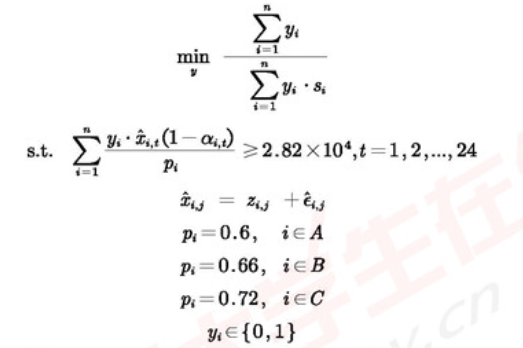

这里的符号说明：$y_i$是0-1决策变量，表示选不选中供应商i，$\alpha_{i,t}$是第t周供货商供货原材料转运损失率，这个可以简化为平均数。$z_{i,t}$是第t周企业对供货商i的订货量，$\epsilon$是实际误差项，$\hat x$是估计值，其实就用平均值来简化就行。

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


<Figure size 4000x8000 with 0 Axes>

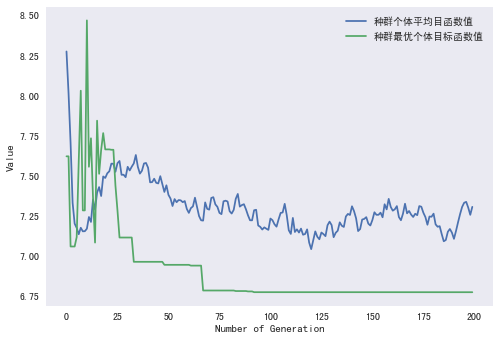

最优解的目标函数值： 8.469655353126448
最优解的决策变量值为：
x1= 1 原材料类别： B
x1= 1 原材料类别： A
x1= 1 原材料类别： C
x1= 1 原材料类别： C
x1= 1 原材料类别： B
x1= 1 原材料类别： A
x1= 1 原材料类别： B
x1= 1 原材料类别： B
x1= 1 原材料类别： A
x1= 1 原材料类别： B
x1= 1 原材料类别： B
x1= 1 原材料类别： A
x1= 1 原材料类别： A
x1= 1 原材料类别： C
x1= 1 原材料类别： B
x1= 1 原材料类别： C
x1= 1 原材料类别： C
x1= 1 原材料类别： C
x1= 1 原材料类别： A
x1= 1 原材料类别： C
x1= 1 原材料类别： A
x1= 1 原材料类别： A
x1= 1 原材料类别： C
x1= 1 原材料类别： B
x1= 1 原材料类别： B
x1= 1 原材料类别： B
x1= 1 原材料类别： B
x1= 1 原材料类别： C
x1= 1 原材料类别： B
x1= 1 原材料类别： B
x1= 1 原材料类别： C
x1= 1 原材料类别： C
x1= 1 原材料类别： C
x1= 1 原材料类别： A
x1= 1 原材料类别： C
x1= 1 原材料类别： C
x1= 1 原材料类别： A
x1= 1 原材料类别： C
x1= 1 原材料类别： A
x1= 1 原材料类别： A
x1= 1 原材料类别： A
x1= 1 原材料类别： A
共选择个数： 42
用时： 0.28829383850097656 秒
{'A': 14, 'B': 13, 'C': 15}


供应商ID 材料分类  W001  W002  W003  W004   W005  W006  W007  W008  ...  W231  \
0   S007    A     9    94    37   102     25    21    22    15  ...    17   
1   S031    B     5    84    69    79     97   103    84   102  ...   171   
2   S037    C     0     0     0     0      0     0     0     0  ...    22   
3   S055    B    55   812    56    51     74    59    56    69  ...    60   
4   S074    C     6     0     3     0      3     0     7     0  ...     4   
5   S080    C    55    21    89    17    104    24    82    27  ...   170   
6   S086    C     3     0   666     0      0     2     1     1  ...     4   
7   S108    B   556  7871   832   636    761   707   615   636  ...   781   
8   S114    A   354     0     1   550      4     7     4     5  ...     9   
9   S126    C     5     0     0     0      0     0     0     0  ...     0   
10  S131    B     2   539   657   628    620   663   426   661  ...   525   
11  S139    B  6390     0  7023     0      5    16    10    11  ...    21   
12  S140    B    10     0     0     0  15687     4     1    11  ...    12   
13  S143    A    13   638    38   428    252   557    33   592  ...   356   
14  S151    C   146   553   643   610    721   663   628   612  ...   724   
15  S189    A    71    54    52    62     64    64    82    81  ...     0   
16  S194    C   242   349   304   369    435   427   404   431  ...   426   
17  S210    C     6     0     0     0      3     0     0     0  ...   450   
18  S218    C    96    29    65    18     89    44    46    31  ...   116   
19  S229    A  2006  1138   993  1027   1155  1175  1299  1786  ...  1313   
20  S244    C    45    13    18     9     10    18    32    67  ...   148   
21  S268    C   509   516   522   521    569   574   433   481  ...   559   
22  S273    A     0     0     0     0      0     0     0     0  ...   144   
23  S275    A   395   525   577   546    643   651   487   618  ...   830   
24  S282    A     2   162   116   108    139   237   367   470  ...   995   
25  S291    A     6     0     0     0    686     3     4    10  ...     8   
26  S292    A   177     0     0   220      0     0   277     0  ...     0   
27  S294    C     1    68    75    64     82    87    68    65  ...    81   
28  S306    C   406   260   320   344    408   379   385   356  ...   589   
29  S307    A     1     3     4   214    155  4345     4     3  ...     1   
30  S308    B   332   340   752   298    439   471   375   699  ...   309   
31  S329    A   495   494   612   573    681   486   628   720  ...   686   
32  S330    B   234   247   231   442    359   445   404   458  ...   186   
33  S338    B     3     0     0  1468      0     6     3     8  ...     4   
34  S340    B    42   609   734   761    791   732   584   759  ...   991   
35  S346    B    75    94    99   123     94    92    85    88  ...    95   
36  S352    A    86    86    80   159    129   167   249   282  ...   640   
37  S356    C    55   209   326   217    218   206   380   540  ...   765   
38  S361    C   910  1212  1253   913   1181   838  1130   886  ...  1088   
39  S364    B   238    75    94   358    221    87    66    90  ...   105   
40  S367    B   167    47   106    50    167    76    98    55  ...   170   
41  S395    A   945     0     0     0      0     0     0     0  ...     0   

    W232  W233  W234  W235  W236  W237  W238  W239  W240  
0     11    15    18    17    19    17    19    21    17  
1    169   166   165   143   191   162   180   164   193  
2     10     9     4     3    14    21     1     1     0  
3     56    57    59    51    50    57    48    70    59  
4      0     4     0     4     0     2     0     4     0  
5     31   146    31   141    23   126    32   105    25  
6      2     6     7     5     2     2     4     3     5  
7    660   804   703   668   639   725   636   755   698  
8      5    12     5     6     4     8     3     4     5  
9      0     0    11     0     0     0     0     0     0  
10   619   596   705   576   716   684   6

In [37]:
import numpy as np
import geatpy as ea # 导入geatpy库
import time
import pandas as pd
import matplotlib.pyplot as plt

cost_dict = {
'A': 0.6,
'B': 0.66,
'C': 0.72,
}

###################### 导入数据 ######################
file1 = pd.read_excel("附件1 近5年402家供应商的相关数据.xlsx", sheet_name = "供应商的供货量（m³）")

cost_trans = pd.read_excel("附件2 近5年8家转运商的相关数据.xlsx")
supplier_id = new_dd['供应商ID']
score = (Result.loc[select_supliers_50])['综合得分指数'].to_numpy()
pred_volume = new_dd['平均供货量'].to_numpy()
output_volume_list = []

for i in range(len(pred_volume)):
  output_volume = pred_volume[i] / cost_dict[material_type[i]]
  output_volume_list.append(output_volume)

output_volume_array = np.array(output_volume_list)

################# 构建问题2-1模型 ************#################

def aimfunc(Y, CV, NIND):
  coef = 1
  cost = (cost_trans.mean()/100).mean()
  f = np.divide(Y.sum(axis = 1).reshape(-1,1),coef*(Y * np.tile(score, (NIND,1))).sum(axis =1). reshape(-1,1))
  CV = -(Y * np.tile(output_volume_array * (1-cost), (NIND,1))).sum(axis = 1)+(np.ones((NIND))*2.82*1e4)
  CV = CV.reshape(-1,1)
  return [f, CV]

############### 使用遗传算法求解 ##################

#####################变量设置 ####################

X = [[0, 1]]*50 # 决策变量范围
B = [[1, 1]]*50 # 决策变量边界，1表示包含范围的边界， 0表示不包含
D = [1,] * 50

ranges=np.vstack(X). T # 生成自变量的范围矩阵，使得第一行为所有决策变量的下界，第二行为上界
borders=np.vstack(B).T # 生成自变量的边界矩阵
varTypes=np.array(D) # 决策变量的类型， 0表示连续，1表示离散

#############**## 染色体编码设置 ###################
Encoding = 'BG' # 'BG"表示采用二进制/格雷偏码
codes = [0,]*50# 决策变量的编码方式，设置两个e表示两个决策变量均使用二进制编码
precisions =[4,]*50 # 决策变量的编码精度，表示二进制编码串解码后能表示的决策变量的精度可达到小数点后6位
scales = [0,]*50 # 0表示采用算术刻度，1表示采用对数刻度
FieldD = ea.crtfld(Encoding,varTypes,ranges , borders , precisions , codes,scales) # 调用函数创建译码矩阵

#################### 遗传算法参数设置 ###############

NIND= 100 # 种群个体数目
MAXGEN = 200 #最大遗传代数
maxormins = [1] # 列表元素为1则表示对应的目标函数是最小化，元素为-1则表示对应的目标函数是最大化
maxormins = np.array(maxormins) # 转化为Numpy array行向量

selectstyle = "rws" # 采用轮盘赌选择
recStyle = "xovdp" # 采用两点交叉
mutstyle = "mutbin" #采用二进制染色体的变异算子
Lind = int(np.sum(FieldD[0,:])) #  计算染色体长度

pc = 0.7 # 交叉概率
pm = 1/Lind # 变异概率
obj_trace = np.zeros((MAXGEN,2))#定义目标函数值记录器
var_trace = np.zeros((MAXGEN,Lind)) # 染色体记录器，记录历代最优个体的染色体
                     
####################开始遗传算法进化 #################

start_time = time.time() # 开始计时
Chrom = ea.crtpc(Encoding,NIND, FieldD)# 生成种群染色体矩阵
variable = ea.bs2ri(Chrom, FieldD)#对初始种群进行解码
CV = np.zeros((NIND, 1))# 初始化一个CV矩阵（此时因为未确定个体是否满足约束条件，因此初始化元素为0，暂认为所有个体是可行解个体）
ObjV, CV = aimfunc(variable, CV, NIND) # 计算初始种群个体的目标函数值
FitnV = ea.ranking(ObjV, CV, maxormins) # 根据目标函数大小分配适应度值
best_ind = np.argmax(FitnV) # 计算当代最优个体的序号

#####开始进化####

for gen in range(MAXGEN):
  SelCh = Chrom[ea.selecting(selectstyle,FitnV,NIND-1),:]
  SelCh = ea.recombin(recStyle, SelCh, pc) # 重组
  SelCh = ea.mutate(mutstyle, Encoding,SelCh,pm)
  # 把父代精英个体与子代的染色体进行合并，得到新一代种群
  Chrom = np.vstack([Chrom[best_ind, :], SelCh])
  Phen = ea.bs2ri(Chrom, FieldD) # 对种群进行解码（二进制转十进制）
  ObjV, CV = aimfunc(Phen, CV, NIND) # 求种群个体的目标函数值
  FitnV = ea.ranking(ObjV, CV, maxormins) # 根据目标函数大小分配适应度值
  # 记录
  best_ind = np.argmax(FitnV) # 计算当代最优个体的序号
  obj_trace[gen,0]=np.sum(ObjV)/ObjV.shape[0] #记录当代种群的目标函数均值
  obj_trace[gen,1] =ObjV[best_ind] #记录当代种群最优个体目标函数值
  var_trace[gen, :]=Chrom[best_ind,:] #记录当代种群最优个体的染色体

#####===== 进化完成######
end_time = time.time() # 结束计时
fig = plt.figure(figsize = (10,20), dpi = 400)
ea.trcplot(obj_trace, [["种群个体平均目函数值","种群最优个体目标函数值"]]) # 绘制图像
plt.show()
####################输出结果#############********

best_gen = np.argmax(obj_trace[:,[1]])
print('最优解的目标函数值：', obj_trace[best_gen, 1])
variable = ea.bs2ri(var_trace[[best_gen], :], FieldD) # 解码得到表现型（即对应的决策变量值）
print('最优解的决策变量值为：')
material_dict = {"A":0, 'B':0, "C":0}
for i in range(variable.shape[1]):
  if variable[0, i] == 1:
    print('x'+str(1)+'=',variable[0,i],'原材料类别：' ,material_type[i])
    material_dict[material_type[i]] += 1
print('共选择个数： '+str(variable[0,:].sum()))
print('用时：', end_time - start_time,"秒")
print(material_dict)

############## 模型2-1 结果：选择39家贸易供应商 ###############

select_idx = [i for i in range(variable.shape[1]) if variable[0, i] == 1];
select_suppliers = supplier_id[select_idx]

df_out = file1[file1["供应商ID"].isin(select_suppliers)].reset_index(drop = True)
# df_out .to_excel('P2-1优化结果 .xlsx', index = False)
df_out

和论文中的结果有些差别，但是整体还是差不多，此外就是论文中的目标函数值要比这里的小了许多，这个原因我还不是很清楚，可能是第一问的综合评分差异。

### 供货能力

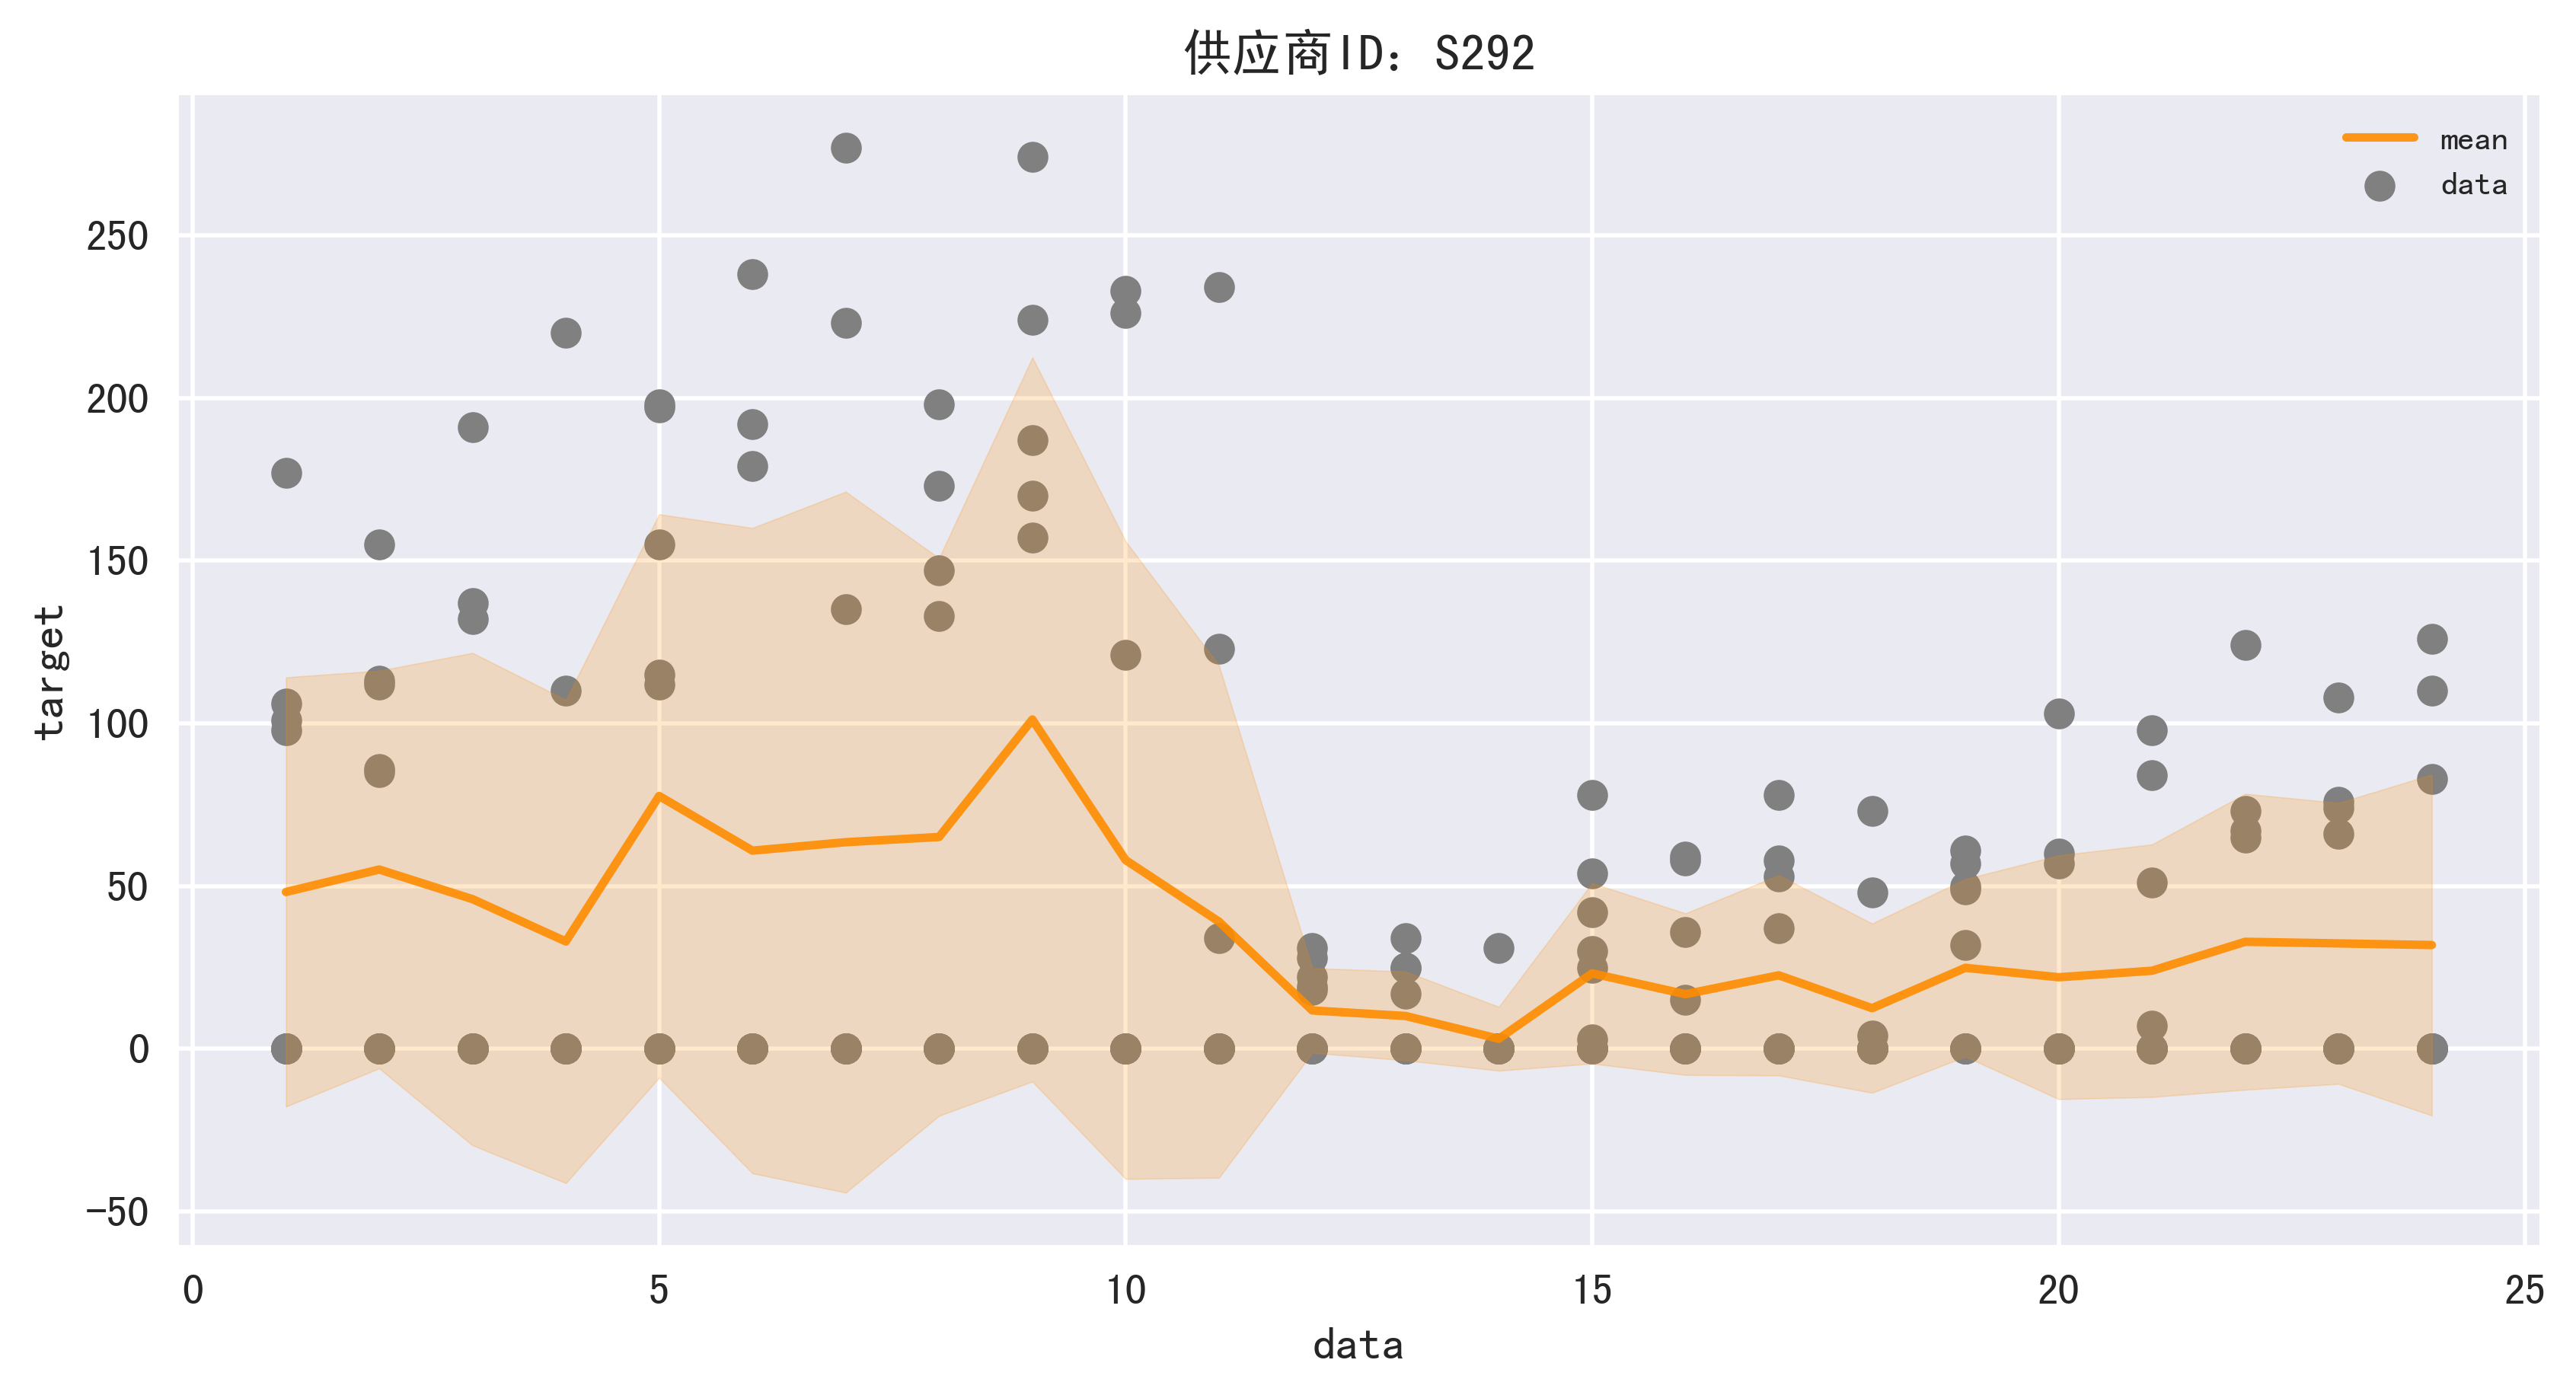

In [73]:
# 供应货能力（高斯过程拟合)
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import MultipleLocator
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.font_manager import fontManager

# 改style要在改font之前
plt.style.use('seaborn')  

fontManager.addfont('SimHei .ttf')
mpl.rc('font', family='SimHei')

# -*- coding:utf-8 -*-

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

select_supliers = [
    'S140',
    "S229",
    "S361",
    "S348",
    "S151",
    "S108",
    "S395",
    "S139",
    "S340",
    "S282",
    "S308",
    "S275",
    "S329",
    "S126",
    "S131",
    "S356",
    "S268",
    "S306",
    "S031",
    "S040",
    "S364",
    "S346",
    "S294",
    "S055",
    "S338",
    "S080",
    "S218",
    "S189",
    "S086",
    "S210",
    "S074",
    "S007",
    "S273",
    "S292"]


################################# 导入数据 ######################################

file = pd.read_excel('附件1 近5年402家供应商的相关数据.xlsx', sheet_name = "企业的订货量（m³）")

file1 = pd.read_excel("附件1 近5年402家供应商的相关数据.xlsx", sheet_name = "供应商的供货量（m³）")

# 
for supplier in select_supliers:
  plt.figure(figsize=(10,5),dpi = 400)
  lw = 2
  X = np.tile(np.arange(1,25),(1,10)).T
  x_plot = np.linspace(1, 24, 24)
  y = np.array(file1[file1['供应商ID'] == supplier].iloc[:,2:]).ravel()
  descrip = pd.DataFrame(np.array(file1[file1["供应商ID"] == supplier].iloc[:,2:]).reshape(-1,24)).describe()
  y_mean = descrip.loc["mean",:]
  y_std = descrip.loc["std",:]
  plt.scatter(X, y, c='grey', label='data')
  plt.plot(x_plot, y_mean, color='darkorange', lw=lw, alpha = 0.9,label='mean')
  plt.fill_between(x_plot, y_mean - 1.* y_std, y_mean + 1. * y_std, color = 'darkorange',alpha=0.2)
  plt.xlabel('data')
  plt.ylabel("target")
  plt.title(f"供应商ID：{supplier}")
  plt.legend(loc ="best", scatterpoints=1, prop={'size':8})
  plt.show()

绘制这种一个坐标多个点的图，可以利用循环x坐标表示。

In [42]:
import numpy as np
X = np.tile(np.arange(1,25),(1,10))
x_plot = np.linspace(1, 24, 24)

In [43]:
X

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24,  1,  2,  3,  4,  5,  6,  7,  8,
         9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
         1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24,  1,  2,  3,  4,  5,  6,  7,  8,
         9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
         1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24,  1,  2,  3,  4,  5,  6,  7,  8,
         9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
         1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24,  1,  2,  3,  4,  5,  6,  7,  8,
         9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
         1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24,  1,  2,  3,  4,  5,  6, 

In [44]:
x_plot

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24.])

In [45]:
import numpy as np
import geatpy as ea # 导入geatpy库
import time
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
import GPy
import warnings
warnings.filterwarnings("ignore")

select_supliers = [
    'S140',
    "S229",
    "S361",
    "S348",
    "S151",
    "S108",
    "S395",
    "S139",
    "S340",
    "S282",
    "S308",
    "S275",
    "S329",
    "S126",
    "S131",
    "S356",
    "S268",
    "S306",
    "S031",
    "S040",
    "S364",
    "S346",
    "S294",
    "S055",
    "S338",
    "S080",
    "S218",
    "S189",
    "S086",
    "S210",
    "S074",
    "S007",
    "S273",
    "S292"]

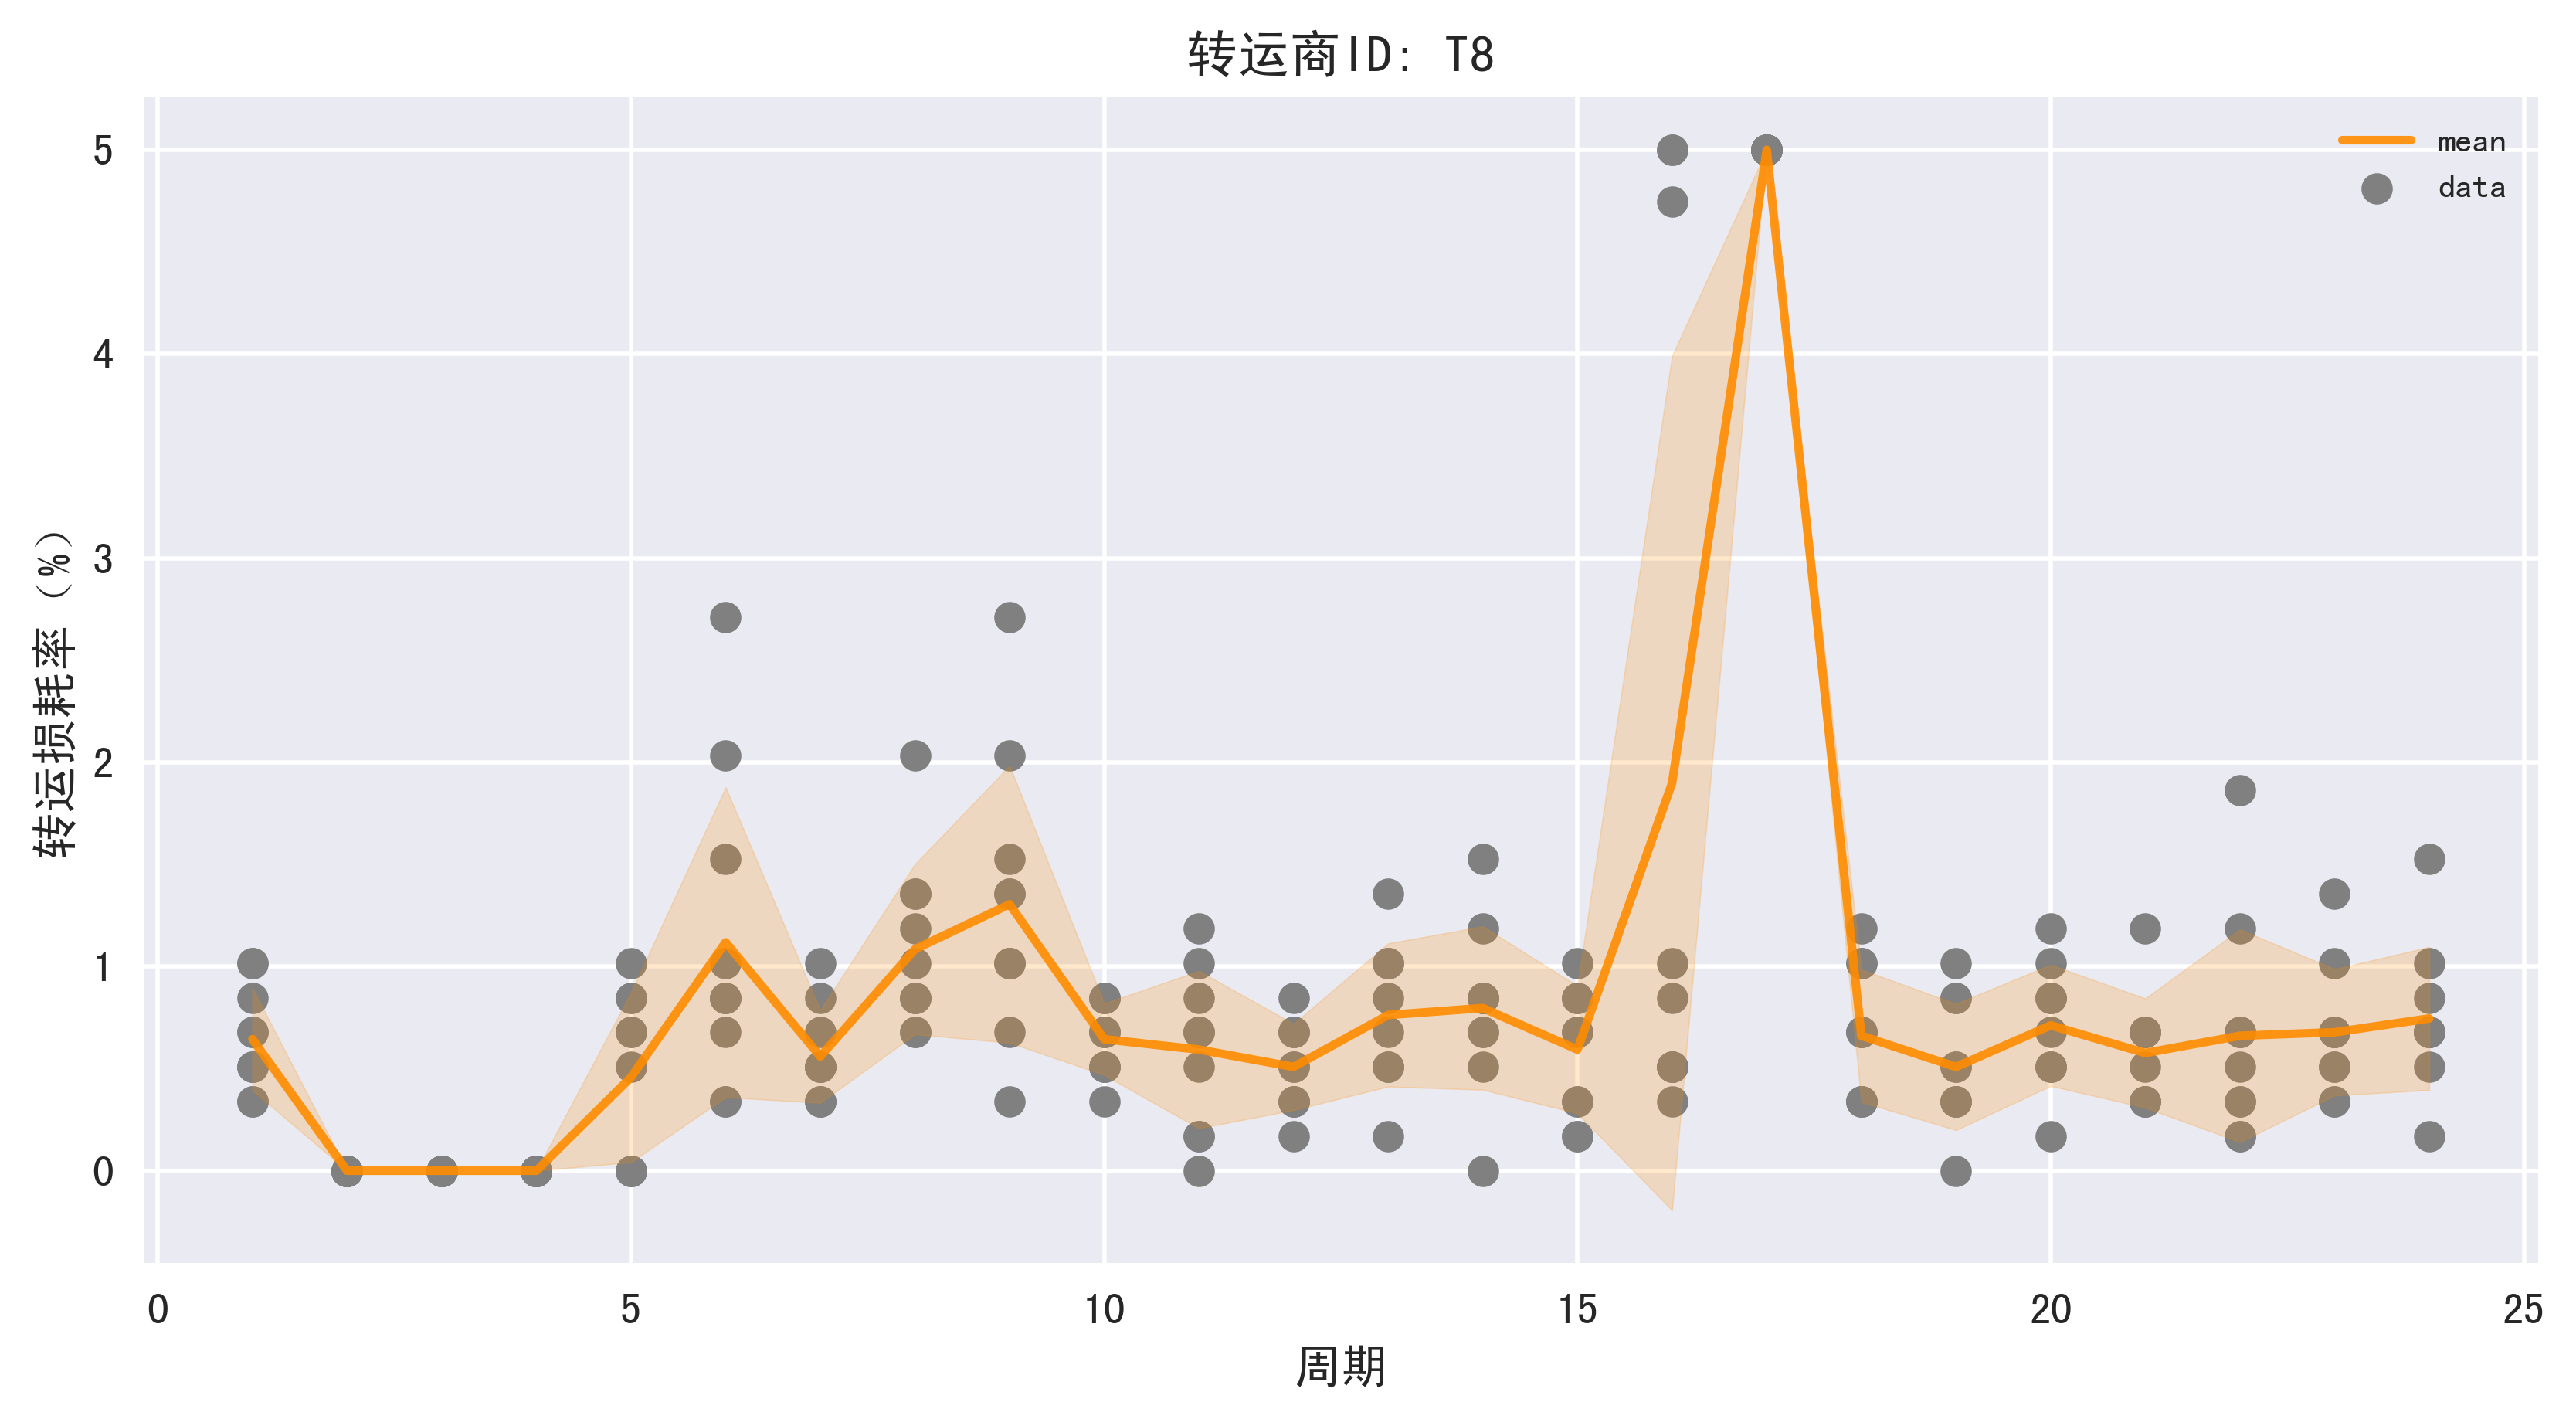

In [46]:
gp_dict = {
'A': [],
'B': [],
'C': []
}


file = pd.read_excel('附件1 近5年402家供应商的相关数据.xlsx', sheet_name = "企业的订货量（m³）")
file1 = pd.read_excel("附件1 近5年402家供应商的相关数据.xlsx", sheet_name = "供应商的供货量（m³）")
loss_ratio_df = pd .read_excel("附件2 近5年8家转运商的相关数据.xlsx")

# x_A_pred_list = pd .read_excel("P2-2A结果.xlsx", index = False).to_numpy()

# x_B_pred_list = pd .read_excel("P2-2B结果.xlsx", index - False).to_numpy()

# x_c_pred_list = pd . read_excel( "P2-2C结果.xlsx', index = False).to_numpy()


order_volume = file[file["供应商ID"].isin(select_supliers)].iloc[:,2:]
supply_volume = file1[file1["供应商ID"].isin(select_supliers)].iloc[:,2:]
error_df = (supply_volume - order_volume)/order_volume

y_mean_list, y_std_list = [], []

##在24周周期内，计算8家转运商的平均转运损耗率 ####

for i in range(loss_ratio_df.shape[0]):
  plt.figure(figsize=(10, 5), dpi = 400)
  lw = 2
  X = np.tile(np.arange(1,25),(1,10)).T
  X_plot = np.linspace(1,24,24)
  y = np.array(loss_ratio_df[loss_ratio_df["转运商ID"] == 'T'+str(i+1)].iloc[:,1:]).ravel()
  sub_df = pd.DataFrame(np.array(loss_ratio_df[loss_ratio_df["转运商ID"] == "T"+str(i+1)].iloc[:,1:]).reshape(-1,24))
  y_mean = sub_df.mean(axis = 0)
  y_std = sub_df.std(axis = 0)
  y_mean_list .append(y_mean)
  y_std_list.append(y_std)
  plt.scatter(X, y, c="grey", label='data')
  plt.plot(X_plot, y_mean, color='darkorange', lw=lw, alpha = 0.9,label='mean')
  plt.fill_between(x_plot, y_mean - 1.* y_std, y_mean + 1. * y_std, color='darkorange',
  alpha=0.2)
  plt.xlabel("周期")
  plt.ylabel("转运损耗率（%）")
  plt .title(f"转运商ID: T{str(i+1)}")
  plt.legend(loc="best", scatterpoints=1, prop={'size': 8})
  plt.show()


In [47]:
file1.index = file1['供应商ID']
select_info = file1.loc[select_supliers]

alpha = np.array(y_mean_list).mean(axis = 0)

select_A_ID = select_info[select_info["材料分类"] == "A"]["供应商ID"]
select_B_ID = select_info[select_info["材料分类"] == "B"]["供应商ID"]
select_C_ID = select_info[select_info["材料分类"] == "C"]["供应商ID"]

select_suppliers = pd.unique(select_info["供应商ID"])

num_of_a = select_A_ID.shape[0]

num_of_b = select_B_ID.shape[0]

num_of_c = select_C_ID.shape[0]

In [48]:
file[file["供应商ID"].isin(select_suppliers)]

供应商ID 材料分类  W001  W002  W003  W004   W005  W006  W007  W008  ...  W231  \
6    S007    A     8   150    30   200     20    20    20    10  ...    10   
30   S031    B     4    80   160    70     90   100    80   100  ...   200   
39   S040    B    50   110    90   280    110   100    90   110  ...   120   
54   S055    B    50   810    50    50     70    50    50    60  ...    60   
73   S074    C     5     0     2  1000      2     0     6     0  ...     3   
79   S080    C    50    20   200    10    100    20    80    20  ...   170   
85   S086    C     2     0   660     0      0     1     1     1  ...     3   
107  S108    B   550  7870   830   630    760   700   610   630  ...   780   
125  S126    C     4     0     0     0      0     0     0     0  ...     1   
130  S131    B     1   530   650   620    620   660  1000   660  ...   520   
138  S139    B  6390     0  7020     0      4    10     9    10  ...    20   
139  S140    B     9     0     0     0  15680     3     1  6000  ...    10   
150  S151    C   140   550   640   610    720   660   620   610  ...   720   
188  S189    A    70    50   100    60     60    60    80    80  ...     0   
209  S210    C  1000     0     0  1200      2     0     0     0  ...   460   
217  S218    C    90    20    60    10     80    40    40   120  ...   110   
228  S229    A  2000  1130   990  1020   1150  1170  1420  1780  ...  1310   
267  S268    C   500   510   520   520    560   570   430   480  ...   570   
272  S273    A     0     0     0     0      0     0     0     0  ...   140   
274  S275    A   390   520   570   540    640   650   480   610  ...   830   
281  S282    A     1   160   110   100    130   230   360   470  ...   990   
291  S292    A   170     0     0   220      0     0   310     0  ...     0   
293  S294    C     1    60    70    60     80    80    60    60  ...    80   
305  S306    C   400   260   320   340    400   370   380   350  ...   580   
307  S308    B   330   340   750   290    430   470  7218  1000  ...   300   
328  S329    A   490   490   610   570    680   520   620   720  ...   680   
337  S338    B     2     0     0  1460      0  2000     2     7  ...     3   
339  S340    B    40   600   730   760    790   730   580   750  ...   990   
345  S346    B    70    90    90   120     90    90    80   110  ...   110   
347  S348    A    10     6     0     0      0     0     4   190  ...    50   
355  S356    C    50  1300   320   210    210   200   380   540  ...   760   
360  S361    C   910  1210  1250   910   1180   830  1130   880  ...  1100   
363  S364    B   230    70    90   350    220    80    60    90  ...   100   
394  S395    A   940     0     0     0      0     0     0     0  ...     0   

      W232  W233  W234  W235  W236  W237  W238  W239  W240  
6       10    10    10    10    10    10    30    20    10  
30     160   160   160   140   190   160   210   160   190  
39     110   120   120   110    90   100    90   100   110  
54      50    50    50    50    50    50    40    70    50  
73    1150     3     0  1150     0     3     0     3     0  
79      40   140    30   160    30   120    30   100    20  
85    1110     5     6     4     1     1     5     2     4  
107    660   800   700   660   630   720   630   750   690  
125      0     0    10     0     0     0     0     0     0  
130    610   590   700   570   710   680   600   590   660  
138      4    10     6    10     5     9    10     8     3  
139      8     7     2     3     2     6     3     1     4  
150  21010   640   500   600   510   580   510   550   540  
188      1     0     0     0     0     0     0     0     0  
209    130    40     1   640   670    70   190   150     0  
217     20    90    30    90    30    80    40    70    50  
228   1350  1230  1450  2030  1610  2230  1890  1570  1660  
267    540   530   510   520   540   490   500   530   530  
272    140   160   150   140   140   150   140   130    90  
274    600   710   670   680   700   740   530   810 

In [72]:
select_info

供应商ID 材料分类  W001  W002  W003  W004   W005  W006  W007  W008  ...  W231  \
供应商ID                                                              ...         
S140   S140    B    10     0     0     0  15687     4     1    11  ...    12   
S229   S229    A  2006  1138   993  1027   1155  1175  1299  1786  ...  1313   
S361   S361    C   910  1212  1253   913   1181   838  1130   886  ...  1088   
S348   S348    A    12     7     0     0      0     0     5   190  ...    55   
S151   S151    C   146   553   643   610    721   663   628   612  ...   724   
S108   S108    B   556  7871   832   636    761   707   615   636  ...   781   
S395   S395    A   945     0     0     0      0     0     0     0  ...     0   
S139   S139    B  6390     0  7023     0      5    16    10    11  ...    21   
S340   S340    B    42   609   734   761    791   732   584   759  ...   991   
S282   S282    A     2   162   116   108    139   237   367   470  ...   995   
S308   S308    B   332   340   752   298    439   471   375   699  ...   309   
S275   S275    A   395   525   577   546    643   651   487   618  ...   830   
S329   S329    A   495   494   612   573    681   486   628   720  ...   686   
S126   S126    C     5     0     0     0      0     0     0     0  ...     0   
S131   S131    B     2   539   657   628    620   663   426   661  ...   525   
S356   S356    C    55   209   326   217    218   206   380   540  ...   765   
S268   S268    C   509   516   522   521    569   574   433   481  ...   559   
S306   S306    C   406   260   320   344    408   379   385   356  ...   589   
S031   S031    B     5    84    69    79     97   103    84   102  ...   171   
S040   S040    B    57   111    90   283    116   106    90   113  ...   129   
S364   S364    B   238    75    94   358    221    87    66    90  ...   105   
S346   S346    B    75    94    99   123     94    92    85    88  ...    95   
S294   S294    C     1    68    75    64     82    87    68    65  ...    81   
S055   S055    B    55   812    56    51     74    59    56    69  ...    60   
S338   S338    B     3     0     0  1468      0     6     3     8  ...     4   
S080   S080    C    55    21    89    17    104    24    82    27  ...   170   
S218   S218    C    96    29    65    18     89    44    46    31  ...   116   
S189   S189    A    71    54    52    62     64    64    82    81  ...     0   
S086   S086    C     3     0   666     0      0     2     1     1  ...     4   
S210   S210    C     6     0     0     0      3     0     0     0  ...   450   
S074   S074    C     6     0     3     0      3     0     7     0  ...     4   
S007   S007    A     9    94    37   102     25    21    22    15  ...    17   
S273   S273    A     0     0     0     0      0     0     0     0  ...   144   
S292   S292    A   177     0     0   220      0     0   277     0  ...     0   

       W232  W233  W234  W235  W236  W237  W238  W239  W240  
供应商ID                                                        
S140      9     8     3     4     3     5     4     2     5  
S229   1351  1237  1454  2031  1615  2230  1899  1574  1666  
S361   1429   975  1486  1404   708  1248  2221  1015  1012  
S348     16    78    47    49    45    38    48    59    58  
S151    523   643   504   602   519   583   513   557   547  
S108    660   804   703   668   639   725   636   755   698  
S395      0     0   631     0     0     0     0     0     0  
S139      5    17     7    15     6    10    13     9     4  
S340    970   770   758   798   777   811   742   779   961  
S282    936   959  1072  1216  1351  1412  1271  1036   708  
S308    232   219   240   294   283   152   313   221   279  
S275    604   711   671   687   706   744   532   786   779  
S329    785   766   569   611   639   676   632   553   730  
S126      0     0    11     0     0     0     0     0     0  
S131    619   596   705   576   716   684   608   599   660  
S356    708   621   666   675   699  1222   980   631  1478  
S268    5

In [ ]:
def GP_reg(i):
  type_ = file[file["供应商ID"].isin(select_suppliers)].iloc[i, 1] # 得到是A，B，C
  np.random.seed(1)
  y = error_df.iloc[i, :]
  X = order_volume.iloc[i, :]
  X = np.array(X[ (y < 1000) ]).reshape(-1, 1)
  y = np.array(y[ (y < 1000) ]).ravel()
  k = GPy.kern.RBF(1)
  m = GPy.models.GPRegression(X, y.reshape(-1, 1), k, normalizer=True)
  m.optimize()
  print(m)

  dy = np.sqrt(list(m['Gaussian_noise.variance'])[0]) * np.random.random(y.shape)

  # Instantiate a GauCssian Process model
  kernel = C(list(m['rbf.variance'])[0],(1e-3, 1e3))* RBF(list(m["rbf.lengthscale"])[0],(1e-5, 1e5))
  # kernel = c(e.985,（1e-3, 1e3））“RBF(e.377,(le-5, 1e3))
  gp = GaussianProcessRegressor(kernel=kernel, alpha=dy **1,
  n_restarts_optimizer=10)

  # Fit to data using Maximum Likelihood Estimation of the parameters
  gp.fit(X, y)
  gp_dict[type_].append(gp)

  # Make the prediction on the meshed x-axis (ask for MSE as well)
  x = np.atleast_2d(np.linspace(0, max(X)[0], 1000)).T
  y_pred, sigma = gp.predict(x, return_std=True)
  # Plot the function, the prediction and the 95% confidence interval based on
  # the MSE
  plt.figure(dpi=400)
  # plt.errorbar(x.ravel(), y, dy, fmt='r.', markersize=1e, label='Observations ')
  plt.plot(X, y, 'r.', markersize=10, label='observations')
  plt.plot(x, y_pred, 'b-', label="Prediction")
  plt.fill(np.concatenate([x, x[::-1]]),
  np.concatenate([y_pred - 1.9600 * sigma,
  (y_pred + 1.9600 * sigma)[ ::-1]]),
  alpha=.5, fc='b', ec="None", label="95% confidence interval")
  plt.xlabel("订单量（m3）")
  plt.ylabel('误差率（%）')
  plt.legend(loc="upper left")
  supplier = file[file["供应商ID"].isin(select_suppliers)].iloc[i,0]
  plt.title(f"原料{type_}供应商{supplier} |偏差率和订单量高斯过程拟合图")
  plt.show()

for i in range(34):
  GP_reg(i)

遗传算法求解：

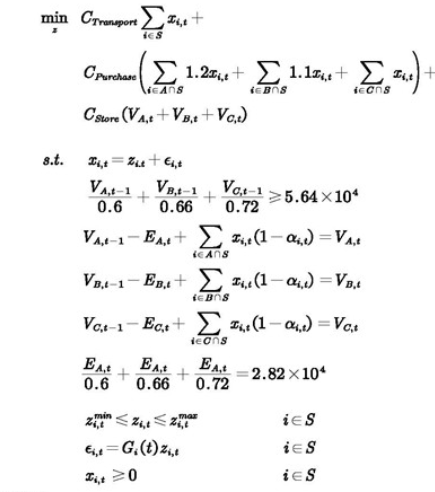

In [50]:
def get_range_list(type_, week_i = 1):

  df = select_info[select_info["材料分类"] == type_].iloc[:,2:]
  min_ = df.iloc[:, np.arange(week_i - 1,240,24)].min(axis = 1)
  max_ = df.iloc[:, np.arange(week_i - 1,240,24)].max(axis = 1)
  range_ = list(zip(min_, max_*1.5))
  range_ = [[i[0], i[1]+1] for i in range_]
  return range_

######### 问题2-2模型目标函数 ##############

Output_list = []
def aimfunc(Phen, V_a, V_b, V_c, CV, NIND,week_i):
  # global定义需要在函数内改变的变量
  global V_a_list, V_b_list, V_c_list
  global V_tol_list, O_prepare_list
  global x_a_pred_list, x_b_pred_list, x_c_pred_list
  global df_A_all, df_B_all, df_C_all
  global Output_list

  C_trans = 1,
  C_purchase = 100,
  C_store = 1

  def error_pred(z, type_):
    # print(z)
    # print(z.shape)
    a = np.array([gp_dict[type_][i].predict(z[:, [i]], return_std=True) for i in
    range(z.shape[1])])
    err_pred = a[ :,0, : ]
    err_std = a[:, 1, :]
    np.random.seed(1)
    nor_err = np.random.normal(err_pred, err_std)
    err = np.transpose(nor_err) * 1e-2
    err *= z
    # err = -0.0ee1*z
    return err

  def convert(x, type_):
    if type_ == 'a': x_ = x * 1.2
    if type_ == 'b': x_ = x * 1.1
    if type_ == "c": x_ = x
    return x

  z_a = Phen[ :, 0:num_of_a]
  z_b = Phen[ :, num_of_a: num_of_a + num_of_b]
  z_c = Phen[ :, num_of_a + num_of_b:]

  errorA = error_pred(z_a, 'A')
  errorB = error_pred(z_b, "B")
  errorC = error_pred(z_c, "C")

  x_a0, x_b0, x_c0 = z_a + errorA, z_b + errorB, z_c + errorC
  x = np.hstack([x_a0,x_b0,x_c0])
  x_a = convert(x_a0, 'a')
  x_b = convert(x_b0, 'b')
  x_c = convert(x_c0, 'c')

  # constraint 5

  # E_a/e.6 = E_b/e.66 - E_c/e.72 = e.96 - 2.82/3

  # e_a = max(np.ones like(V_a)*0.8, 2.82*1e4*V_a/(V_a *e.6 + V_b *0 .66 + V_c * 0.72))
  # e_b - max(np.ones_like(V_b)*0.8, 2.82*1e4*V_b/(V_a *e.6 + V_b *0.66 + V_c * 8.72）)
  # e_c = max(np.ones_like(V_c)*0.8, 2.82*1e4*V_c/(V_a *e.6 + V_b *0.66+ V_c * 0.72))

  e_a = 0.9
  e_b = 0.9
  e_c = 0.9

  # constraint 2 - 4
  V_a2 = V_a * (1 - e_a) + x_a.sum(axis=1)
  V_b2 = V_b * (1 - e_b) + x_b.sum(axis=1)
  V_c2 = V_c * (1 - e_c) + x_c.sum(axis=1)
  # print(V_a.shape == x_a.shape)

  Output = (V_a * e_a * 0.6) + (V_b * e_b * 0.66) + (V_c * e_c * 0.72)
  Output_list.append(Output)

  f = C_trans * x.sum(axis=1) + C_purchase * (x_a.sum(axis=1)+ x_b.sum(axis=1) - x_c.sum(axis=1))
  f = f.reshape(-1, 1)
  # print(f.shape)

  # constraint 1
  CV1 = (2.82 * 1e4 * 2 - x_a.sum(axis=1) * (1 - alpha[week_i - 1]) / 0.6 - x_b.sum(axis=1) *
  (
    1 - alpha[week_i - 1]) / 0.66 - x_c.sum(axis=1) * (1 - alpha[week_i - 1]) /
  0.72)

  # print（'【进化内部】CV1',CV1.mean（））

  CV1 = CV1.reshape(-1, 1)
  CV2 = (z_a.sum(axis=1)+ z_b.sum(axis=1)+ z_c.sum(axis=1) - 4.8 * 1e4).reshape(-1, 1)
  CV1 = np.hstack([CV1, CV2])
  # print(CV1.shape)

  # update 库存
  # print('【进化内部】库存总量： ",(V_a2+V_b2+V_c2).mean())

  return [f, CV1, V_a2, V_b2, V_c2, x_a0, x_b0, x_c0]

In [62]:
######绘制图形####
def plot_pie(week_i, variable):

  global V_a_list, V_b_list, V_c_list
  global V_tol_list, O_prepare_list
  global x_a_pred_list, x_b_pred_list, x_c_pred_list
  global df_A_all, df_B_all, df_C_all
  global x_A_all, x_B_all, x_C_all

  # select_A_ID = file1[file1["材料分类"] == "A"]['供应商ID']
  # select_B_ID = file1[file1["材料分类"] == "B"]['供应商ID']
  # select_C_ID = file1[file1["材料分类"] == "C"]["供应商ID"]

  num_of_a = select_A_ID.shape[0]
  num_of_b = select_B_ID.shape[0]
  num_of_c = select_C_ID.shape[0]

  tol_v = [variable[0, : num_of_a].sum(), \
  variable[0, num_of_a:num_of_a + num_of_b].sum(), \
  variable[0, num_of_a + num_of_b:].sum()]

  print(f"原材料A在第{week_i}周订单量总额{tol_v[0]} \n\
  原材料B在第{week_i}周订单量总额{tol_v[1]} \n\
  原材料C在第{week_i}周订单量总额{tol_v[2]} \n\
  \n\
  原材料第{week_i}周订单量总额：{sum(tol_v)}")

  ############ plot A ######*#####

  fig = plt.figure(dpi = 400)

  # fig - plt.figure(figsize - (7,7））

  explode = (0.04,)*num_of_a
  labels = select_A_ID
  plt.pie(variable[0, : num_of_a], explode = explode,labels = labels, autopct="%1.1f%%")
  plt.title(f"原材料A在第{week_i}周订单量比例")
  # plt.savefig(f'./img/P2-2-Aweek{week_i}.png")
  plt.show()

  #********* plot B ############

  fig = plt.figure(dpi = 400)
  # fig = plt.figure(figsize =（7,7））
  explode = (0.04, )*num_of_b
  labels = select_B_ID
  plt.pie(variable[0,num_of_a:num_of_a+num_of_b], explode = explode, labels = labels,
  autopct="%1.1f%%")
  plt.title(f"原材料B在第{week_i}周订单量比例")
  # plt.savefig(f"./img/P2-2-Bweek{week_i}.png")
  plt.show()

  ############ plot C ###########

  fig = plt.figure(dpi = 400)
  # fig = plt.figure(figsize = (7,7))
  explode = (0.04,)*num_of_c
  labels = select_C_ID
  plt.pie(variable[0,num_of_a+num_of_b:], explode = explode, labels = labels,
  autopct="%1.1f%%")
  plt.title(f"原材料c在第{week_i}周订单量比例")
  #plt.savefig(f"./img/P2-2-Cweek{week_i}.png")
  plt.show()

  df_A = pd .DataFrame(dict(zip(select_A_ID, variable[0, : num_of_a])), index=
  [f"Week{week_i}"])
  df_B = pd.DataFrame(dict(zip(select_B_ID, variable[0, num_of_a:num_of_a + num_of_b])),
  index=[f"Week{week_i}"])
  df_C=pd.DataFrame(dict(zip(select_C_ID, variable[0, num_of_a + num_of_b:])),
  index=[f"Week{week_i}"])

  df_A_all = pd.concat([df_A_all, df_A])
  df_B_all = pd.concat([df_B_all, df_B])
  df_C_all = pd.concat([df_C_all, df_C])

In [64]:
def run_algorithm(week_i):

  global V_a_list, V_b_list, V_c_list
  global V_tol_list, O_prepare_list
  global x_a_pred_list, x_b_pred_list, x_c_pred_list
  global df_A_all, df_B_all, df_C_all
  global x_A_all, x_B_all, x_C_all
  global output_list

  tol_num = 34
  z_a = get_range_list('A', week_i) #第一个决策变量范围
  z_b = get_range_list('B', week_i) # 第一个决策变量范围
  z_c = get_range_list('C', week_i) # 第一个决策变量范围

  # print("ji")

  B = [[1, 1]] * tol_num # 第一个决策变量边界，1表示包含范围的边界，0表示不包含
  D = [1, ] * tol_num

  ranges = np.vstack([z_a, z_b, z_c]).T # 生成自变量的范围矩阵，使得第一行为所有决策变量的下界，第二行为上界
  borders = np.vstack(B).T #生成自变量的边界矩阵
  varTypes = np.array(D) # 决策变量的类型， 0表示连续，1表示离散

  #-----染色体编码设置-----

  Encoding = "BG" # 'BG"表示采用二进制/格雷编码
  codes = [0, ] * tol_num # 决策变量的编码方式，设置两个@表示两个决策变量均使用二进制编码
  precisions = [4, ] * tol_num # 决策变量的编码精度，表示二进制编码串解码后能表示的决策变量的精度可达到小数点后6位
  scales = [0, ] * tol_num # e表示采用算术则度，1表示采用对数刻度
  FieldD = ea.crtfld(Encoding, varTypes, ranges, borders, precisions, codes, scales) # 调用函数创建译码矩阵

  #=======遗传算法参数设置======
  # NIND = 1000 # 种群个体数目
  MAXGEN = 100 #最大遗传代数
  maxormins = [1] # 列表元素为1则表示对应的目标函数是最小化，元素为-1则表示对应的目标函数是最大化
  maxormins = np.array(maxormins) # 转化为Numpy array行向量
  selectstyle = 'rws' # 采用轮盘赌选择
  recstyle = 'xovdp' # 采用两点交叉
  mutstyle = 'mutbin' # 采用二进制染色体的变异算子
  Lind = int(np.sum(FieldD[0,:])) # 计算染色体长度
  pc = 0.8 # 交叉概率
  pm = 1 / Lind # 变异概率
  obj_trace = np.zeros((MAXGEN,2)) #定义目标函数值记录器
  var_trace = np.zeros((MAXGEN,Lind)) # 染色体记录器，记录历代最优个体的染色体
  
  # =====开始遗传算法进化====
  start_time = time.time() #开始计时
  Chrom = ea.crtpc(Encoding, NIND, FieldD) # 生成种群染色体矩阵
  variable = ea.bs2ri(Chrom, FieldD) # 对初始种群进行解码
  CV = np.zeros((NIND, 1)) # 初始化一个Cv矩阵（此时因为未确定个体是否满足约束条件。因此初始化元素为0，暂认为所有个体是可行解个体)
  V_a = V_a_list[-1]
  V_b = V_b_list[-1]
  V_c = V_c_list[-1]
  # print("ji")
  ObjV, CV, V_a_new, V_b_new, V_c_new, x_a, x_b, x_c = aimfunc(variable, V_a, V_b, V_c, CV, NIND,week_i) # 计算初始种群个体的目标函数值
  FitnV = ea.ranking(ObjV, CV, maxormins) # 根据目标函数大小分配适应度值
  best_ind = np.argmax(FitnV) # 计算当代最优个体的序号
  
  # 开始进化
  for gen in tqdm(range(MAXGEN),leave=False):
    SelCh = Chrom[ea.selecting(selectstyle, FitnV, NIND - 1),:] # 选择
    SelCh = ea.recombin(recstyle, SelCh, pc) #重组
    SelCh = ea .mutate(mutstyle, Encoding, SelCh, pm) #变异
    # 把父代精英个体与子代的染色体进行合并，得到新一代种群
    Chrom = np .vstack([Chrom[best_ind, : ], SelCh])
    Phen = ea.bs2ri(Chrom, FieldD) # 对种群进行解码(二进制转十进制）
    # print(Phen.shape)
    ObjV, CV, V_a_new, V_b_new, V_c_new, x_a,x_b, x_c = aimfunc(Phen, V_a, V_b, V_c, CV, NIND,week_i) # 求种群个体的目标函数值
  # if len(cv[cv>0])/len(cv) > e.2:
  # # 
  #   print('cv > 0')

  # #
  # v_a_new, v_b_new, V_c_new = V_a, v_b, v_c
  # #
  # break

    Fitnv = ea.ranking(ObjV, CV, maxormins) # 根据目标函数大小分配适应度值

    # 记录
    best_ind = np.argmax(Fitnv) # 计算当代最优个体的序号
    obj_trace[gen, 0] = np.sum(ObjV) / ObjV.shape[0] # 记录当代种群的目标函数均值
    obj_trace[gen, 1] = ObjV[best_ind] # 记录当代种群最优个体目标函数值
    var_trace[gen, :] = Chrom[best_ind] # 记录当代种群最优个体的染色体

  # 进化完成
  end_time = time.time() # 结束计时
  ea.trcplot(obj_trace,[['种群个体平均目标函数值','种群最优个体目标函数值']] )#绘制图像
  #  输出结果

  best_gen = np.argmax(obj_trace[: ,[1]])
  print('最优解的目标函数值： ',obj_trace[best_gen, 1])
  variable = ea.bs2ri(var_trace[[best_gen], :], FieldD)# 解码得到表现型（即对应的决策变量值）
  # print("最优解的决策变量值为： ")
  # #

  # for i in range(variable.shape[1]):
  # print('z'+str(1)+"-",variable[0, i])
  V_tol = (V_a_new + V_b_new + V_c_new)[best_gen];
  V_tol_list.append(V_tol)
  O_prepare = (V_a_new / 0.6 + V_b_new / 0.66 + V_c_new / 0.72)[best_gen];
  O_prepare_list .append(O_prepare)
  x_a_pred = x_a[best_gen]
  x_b_pred = x_b[best_gen]
  x_c_pred = x_c[best_gen]
  x_a_pred_list.append(x_a_pred)
  x_b_pred_list.append(x_b_pred)
  x_c_pred_list.append(x_c_pred)
  print("库存总量：" , V_tol)
  print('预备产能：',O_prepare)
  print("该周产能：" ,Output_list[-1][best_gen])
  Output_list.append(Output_list[-1][best_gen])
  print('用时：', end_time - start_time,'s')
  x_A = pd.DataFrame(dict(zip(select_A_ID, x_a_pred), index=[f"Week{week_i}"]))
  x_B = pd.DataFrame(dict(zip(select_B_ID, x_b_pred), index=[f"Week{week_i}"]))
  x_C = pd.DataFrame(dict(zip(select_C_ID, x_c_pred), index=[f"week_i)"]))
  x_A_all = pd.concat([x_A_all, x_A])
  x_B_all = pd.concat([x_B_all,x_B])
  x_C_all = pd.concat([x_C_all, x_C])

  # update v_list

  V_a_list.append(V_a_new)
  V_b_list.append(V_b_new)
  V_c_list.append(V_c_new)

  return variable

=========== Week 1 ===============


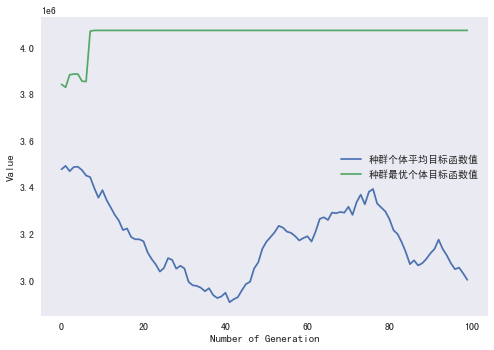

最优解的目标函数值：  4074627.513644155
库存总量： 37509.003165573486
预备产能： 57388.45452264484
该周产能： 33501.6
用时： 31.663681507110596 s
原材料A在第1周订单量总额10015 
  原材料B在第1周订单量总额34096 
  原材料C在第1周订单量总额3927 
  
  原材料第1周订单量总额：48038


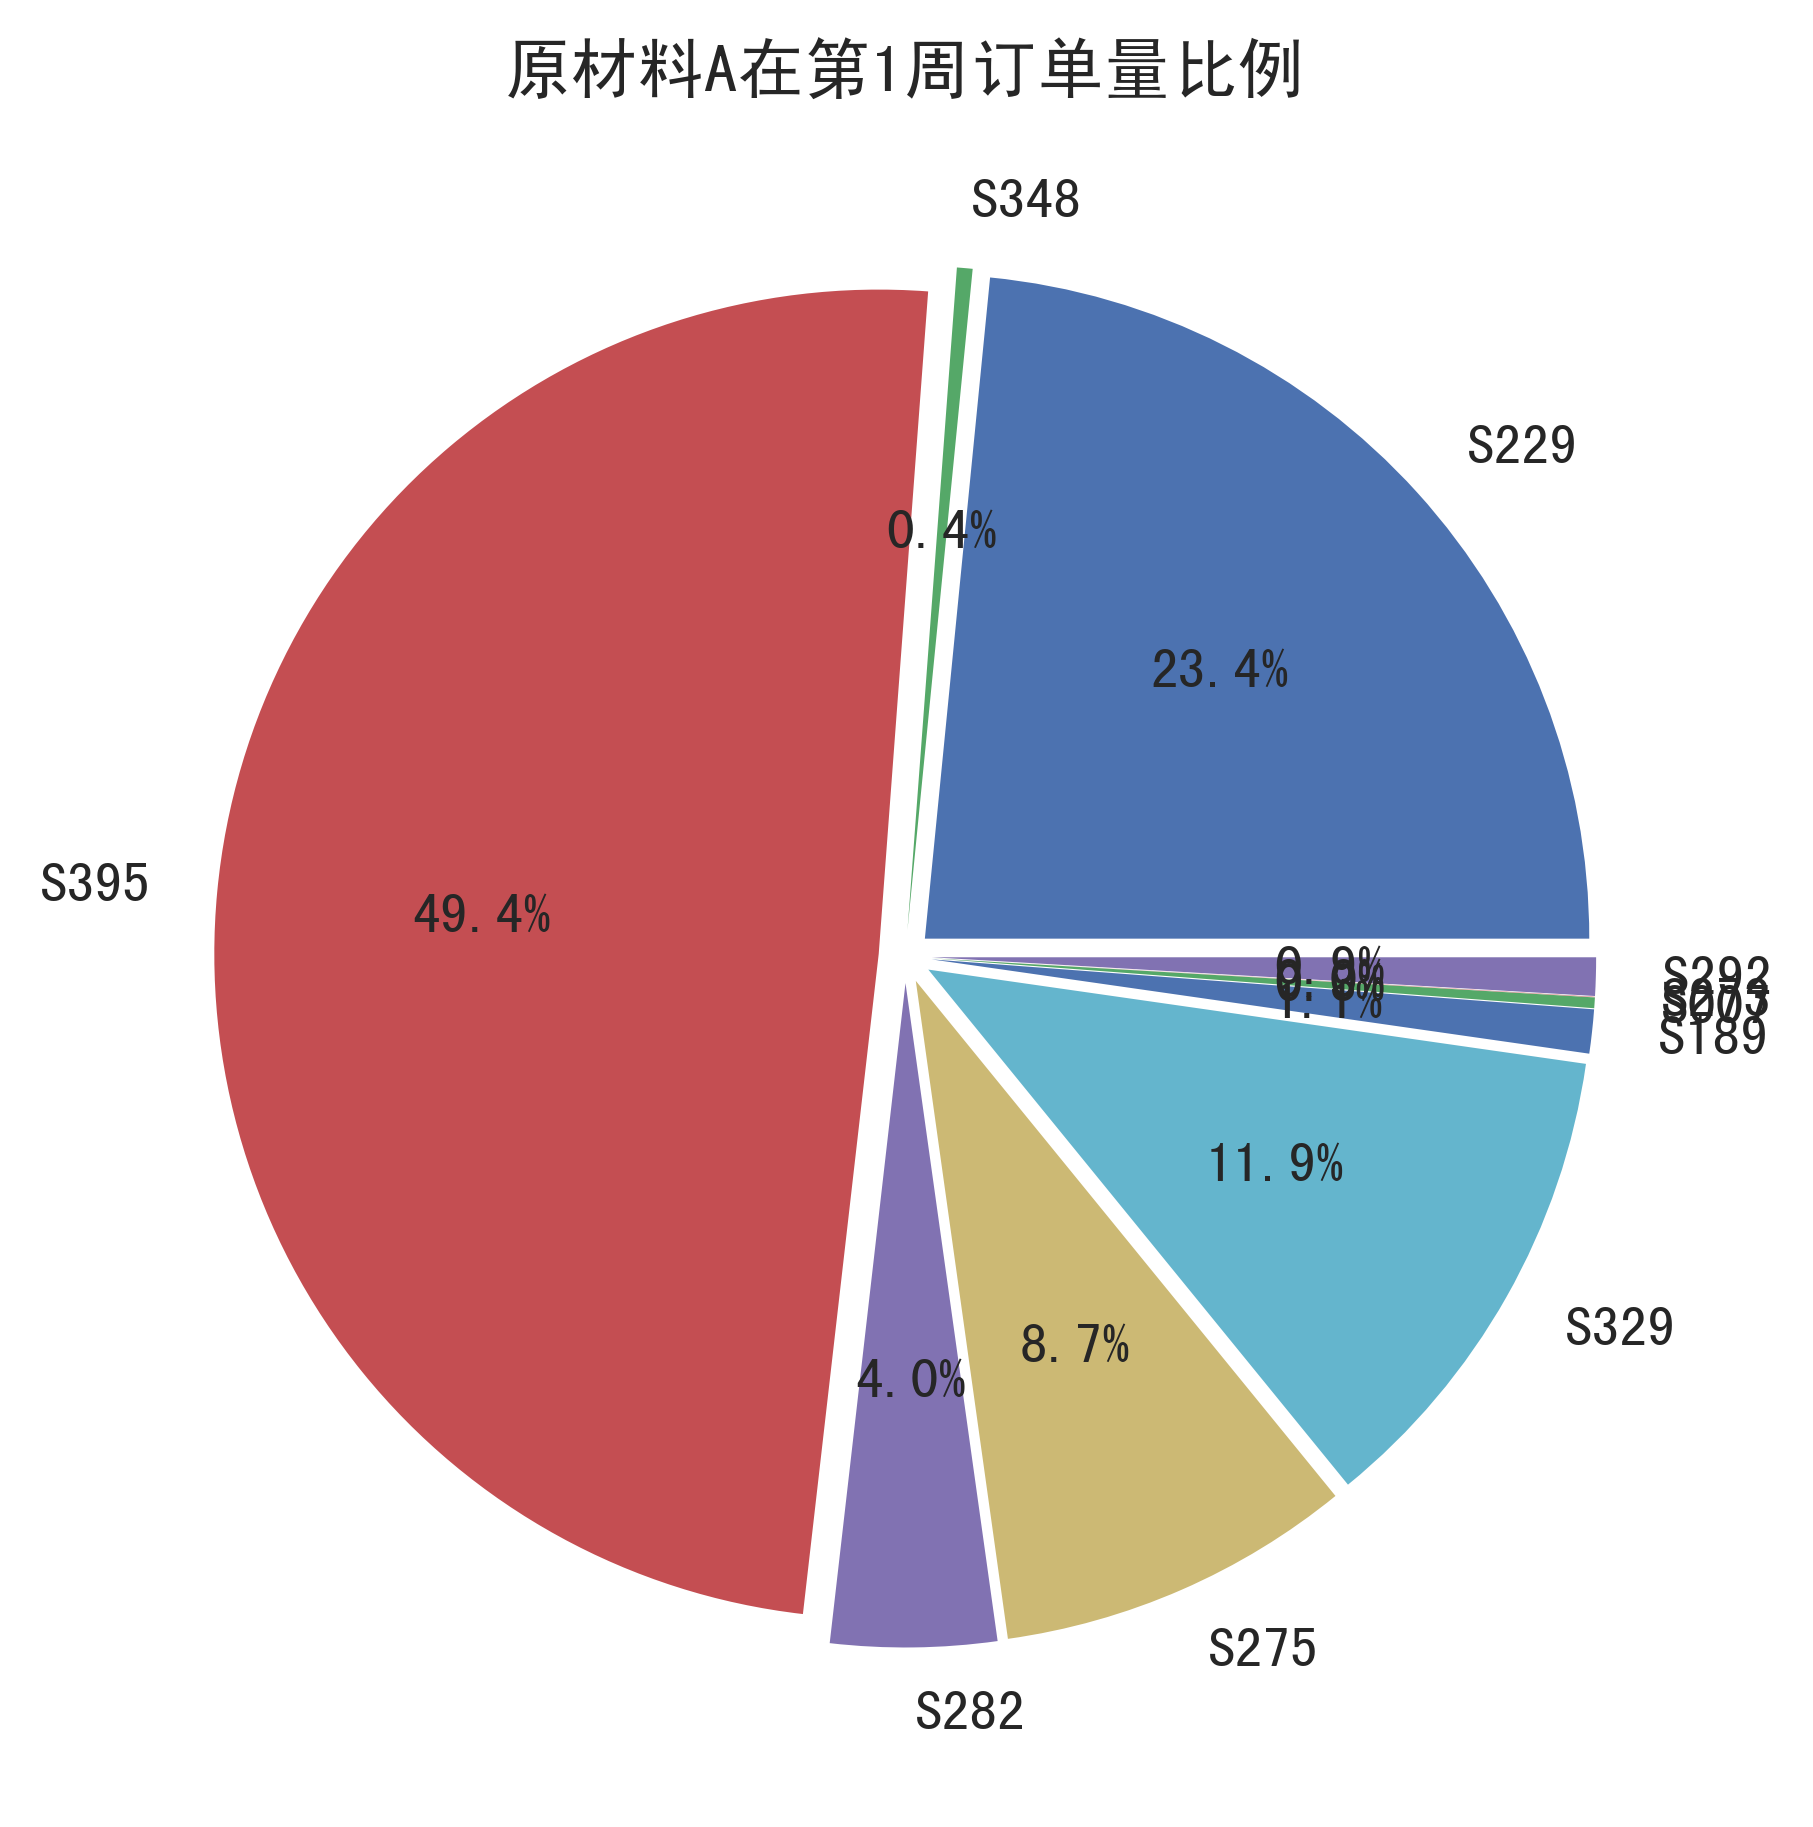

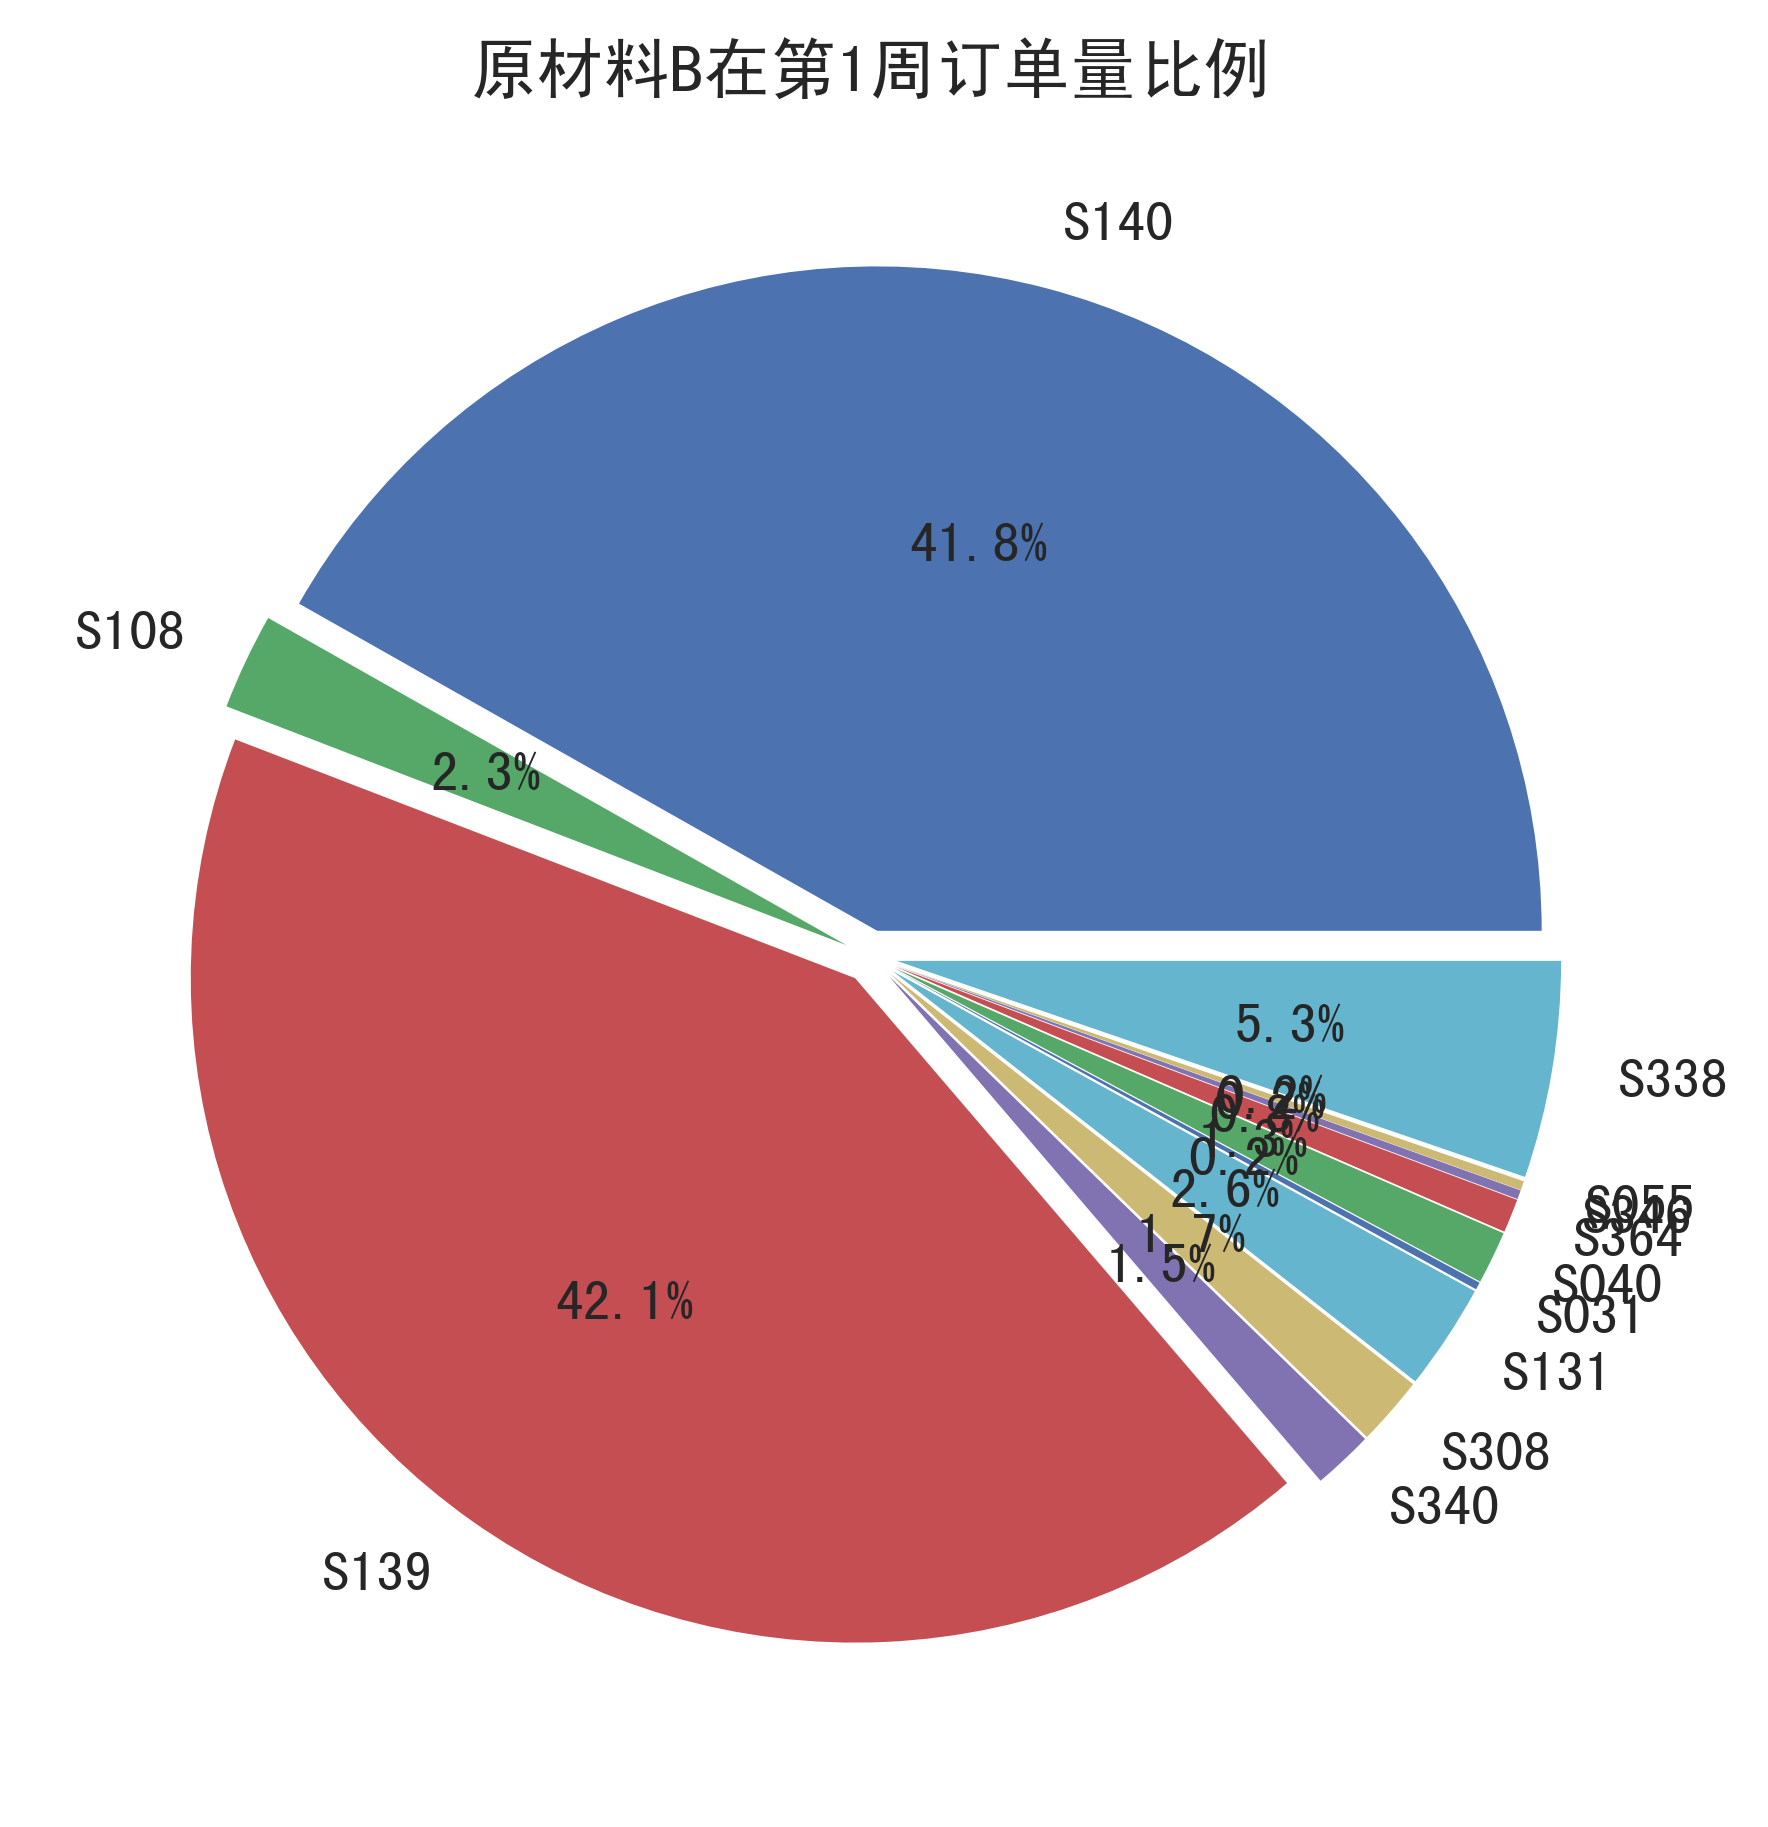

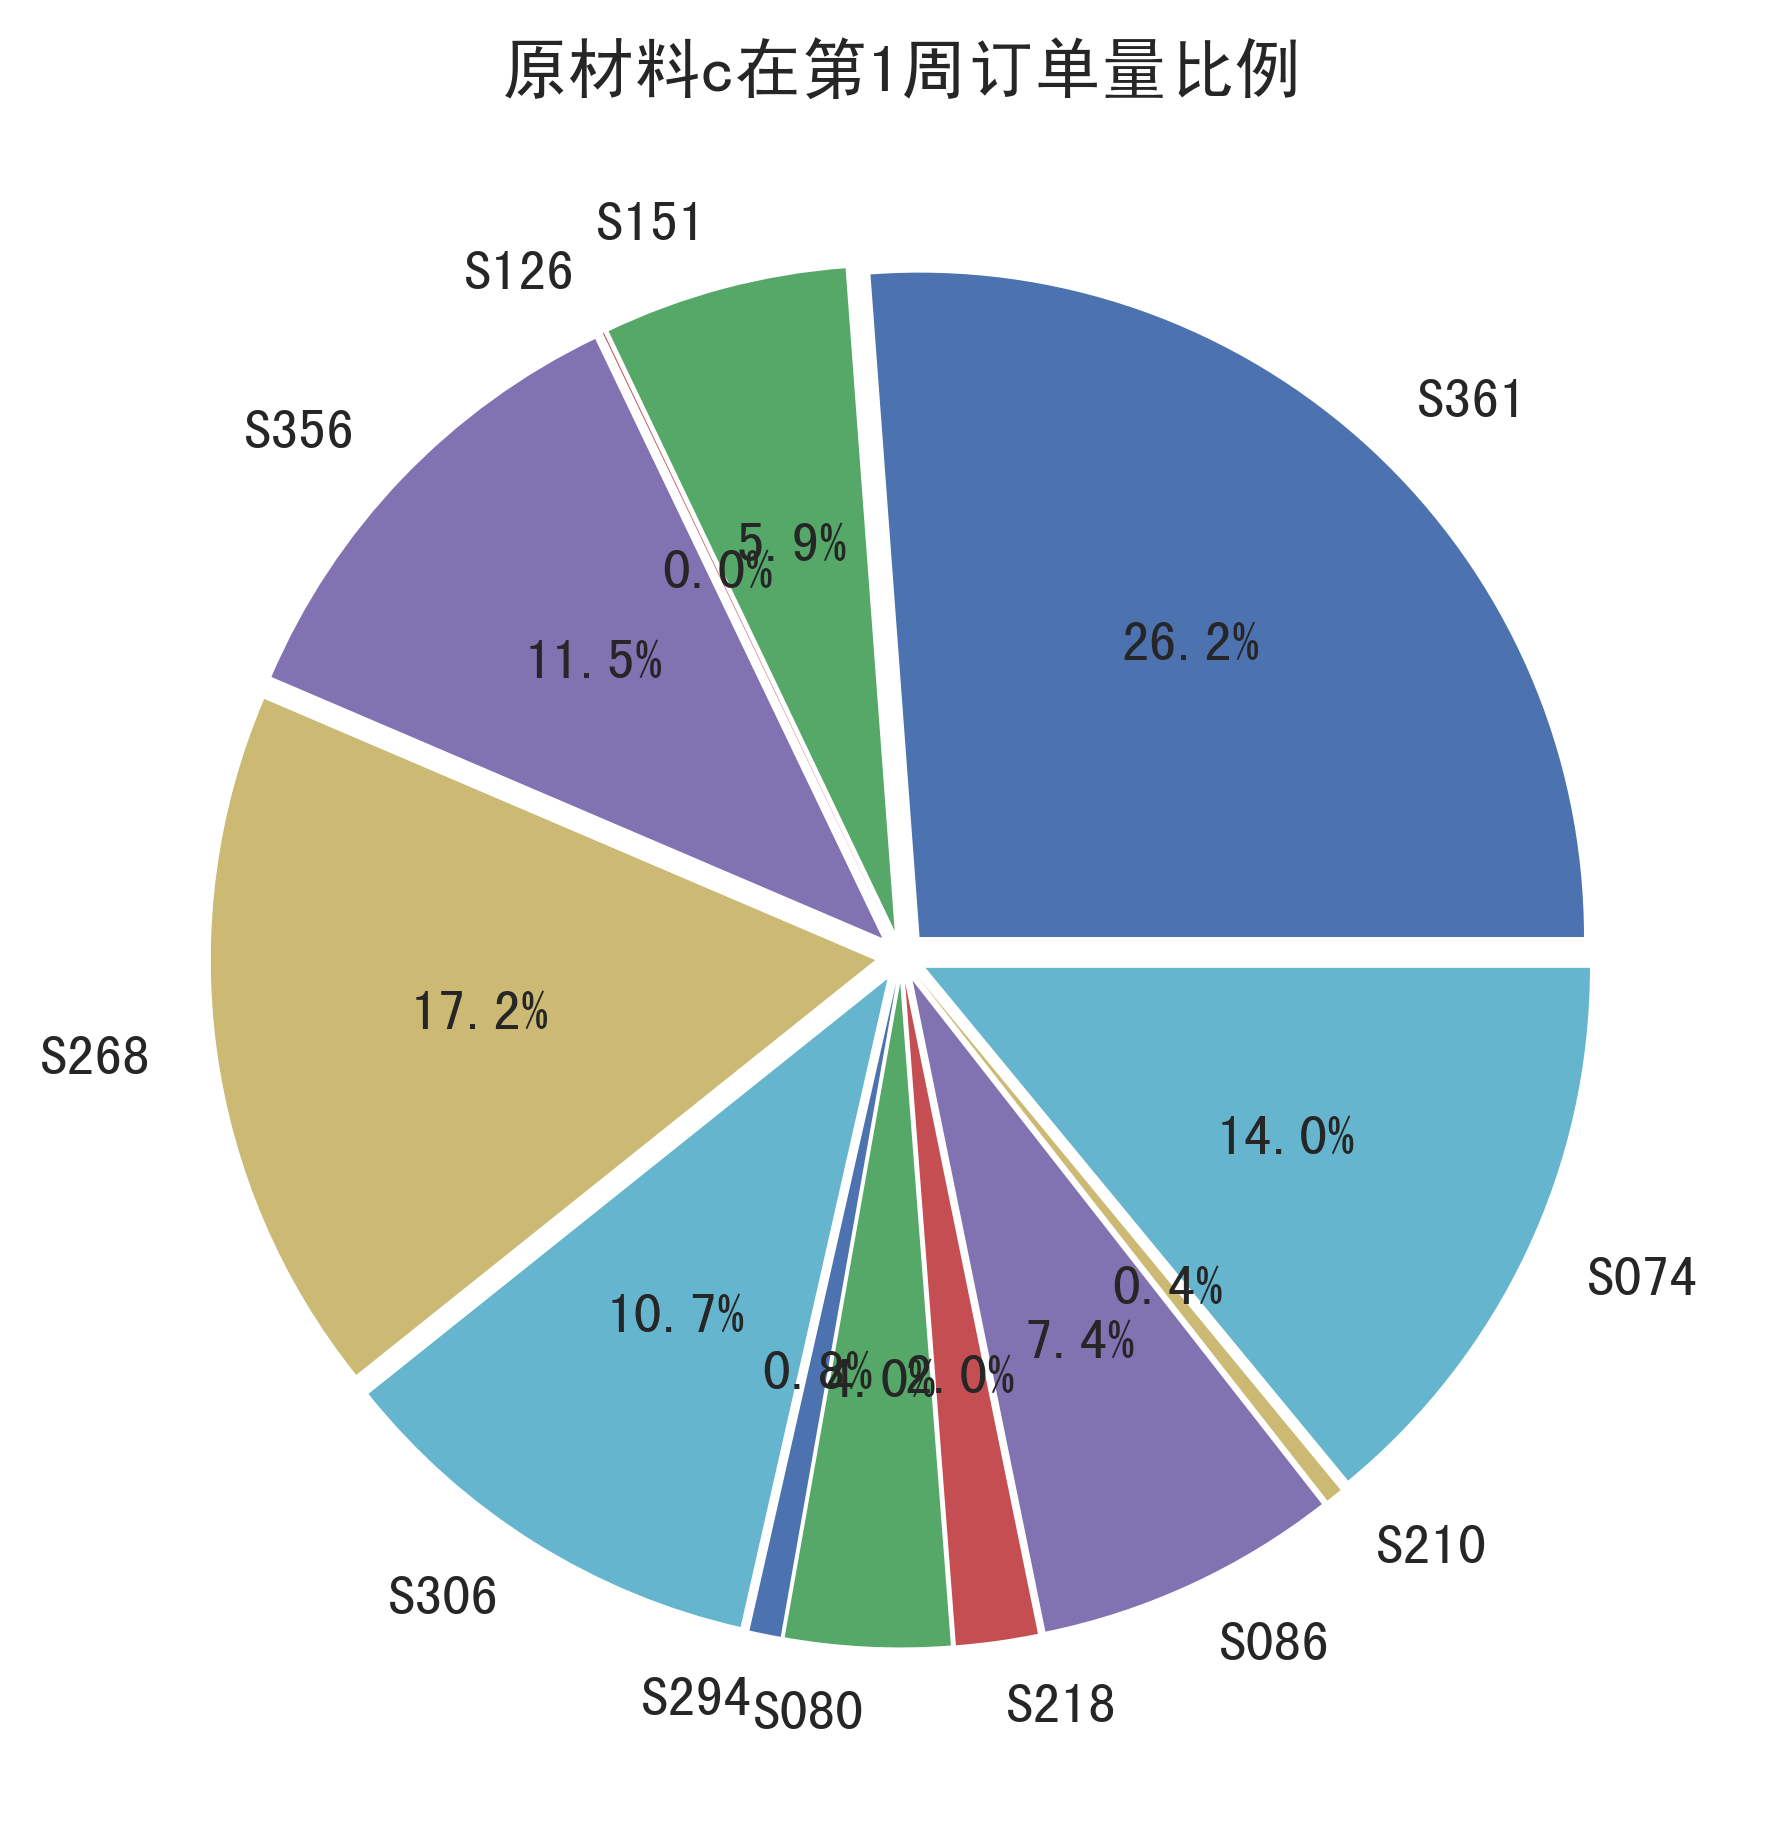

=========== Week 2 ===============


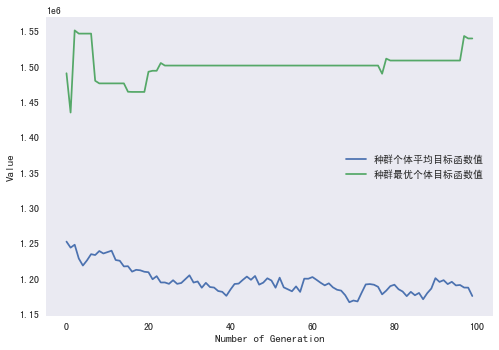

最优解的目标函数值：  1551473.9669593598
库存总量： 28143.497513888113
预备产能： 42695.13343168887
该周产能： 23155.770851936886
用时： 33.27769470214844 s
原材料A在第2周订单量总额4315 
  原材料B在第2周订单量总额16941 
  原材料C在第2周订单量总额6035 
  
  原材料第2周订单量总额：27291


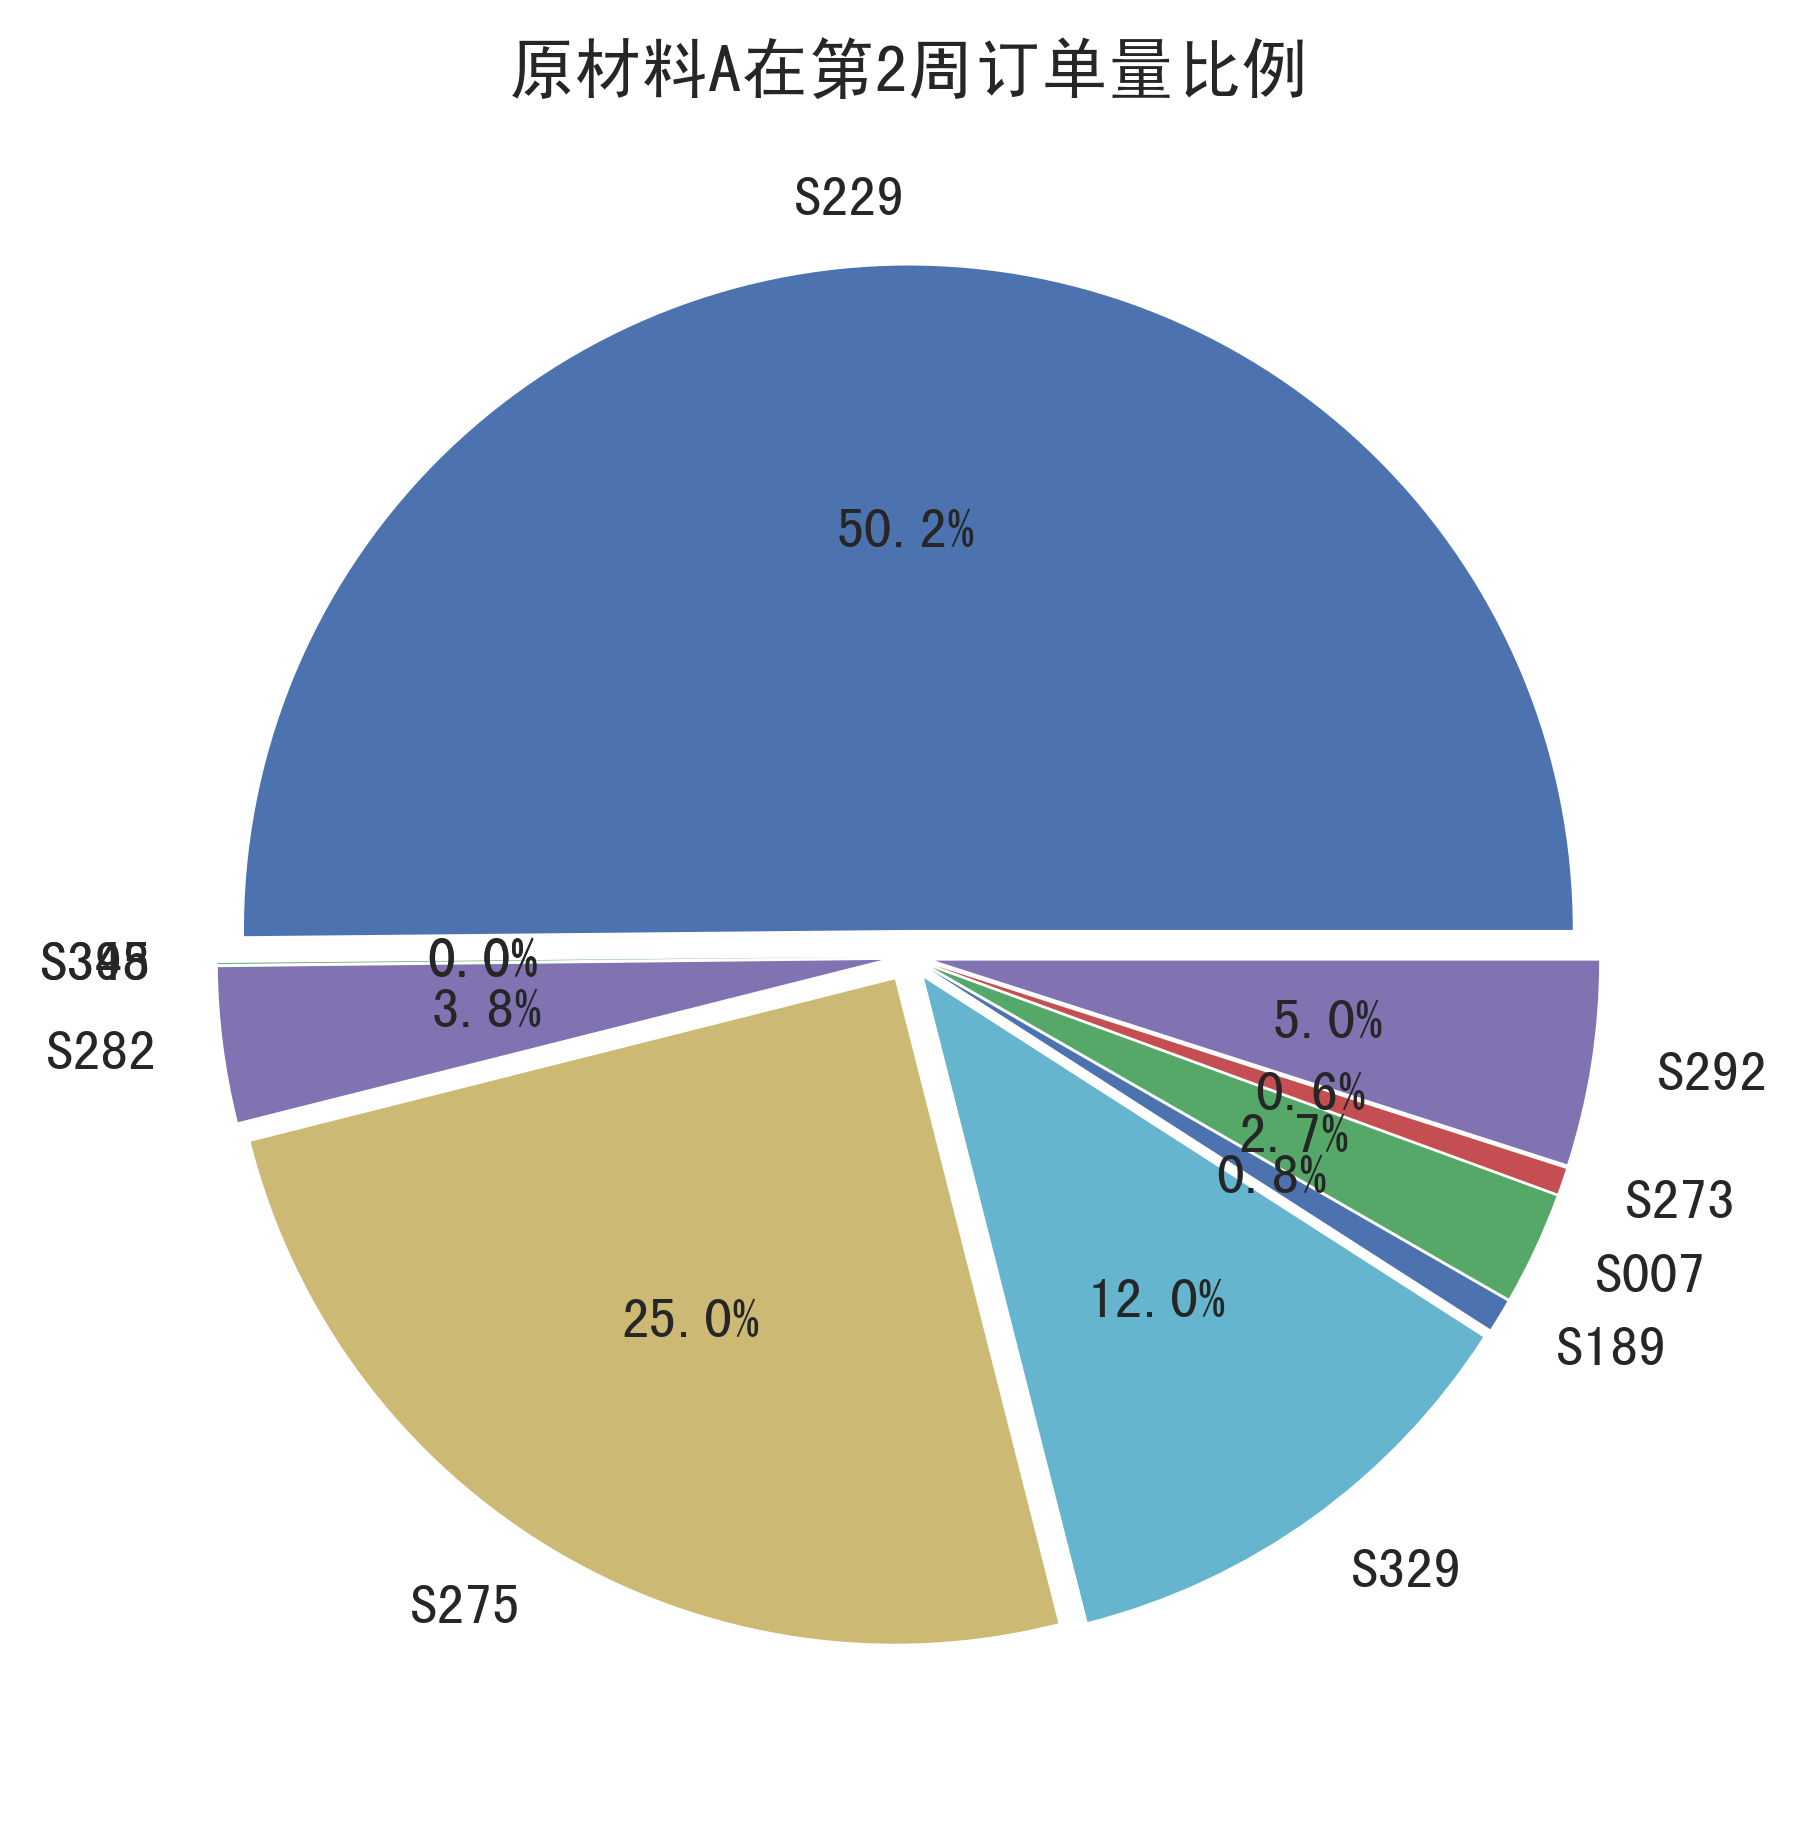

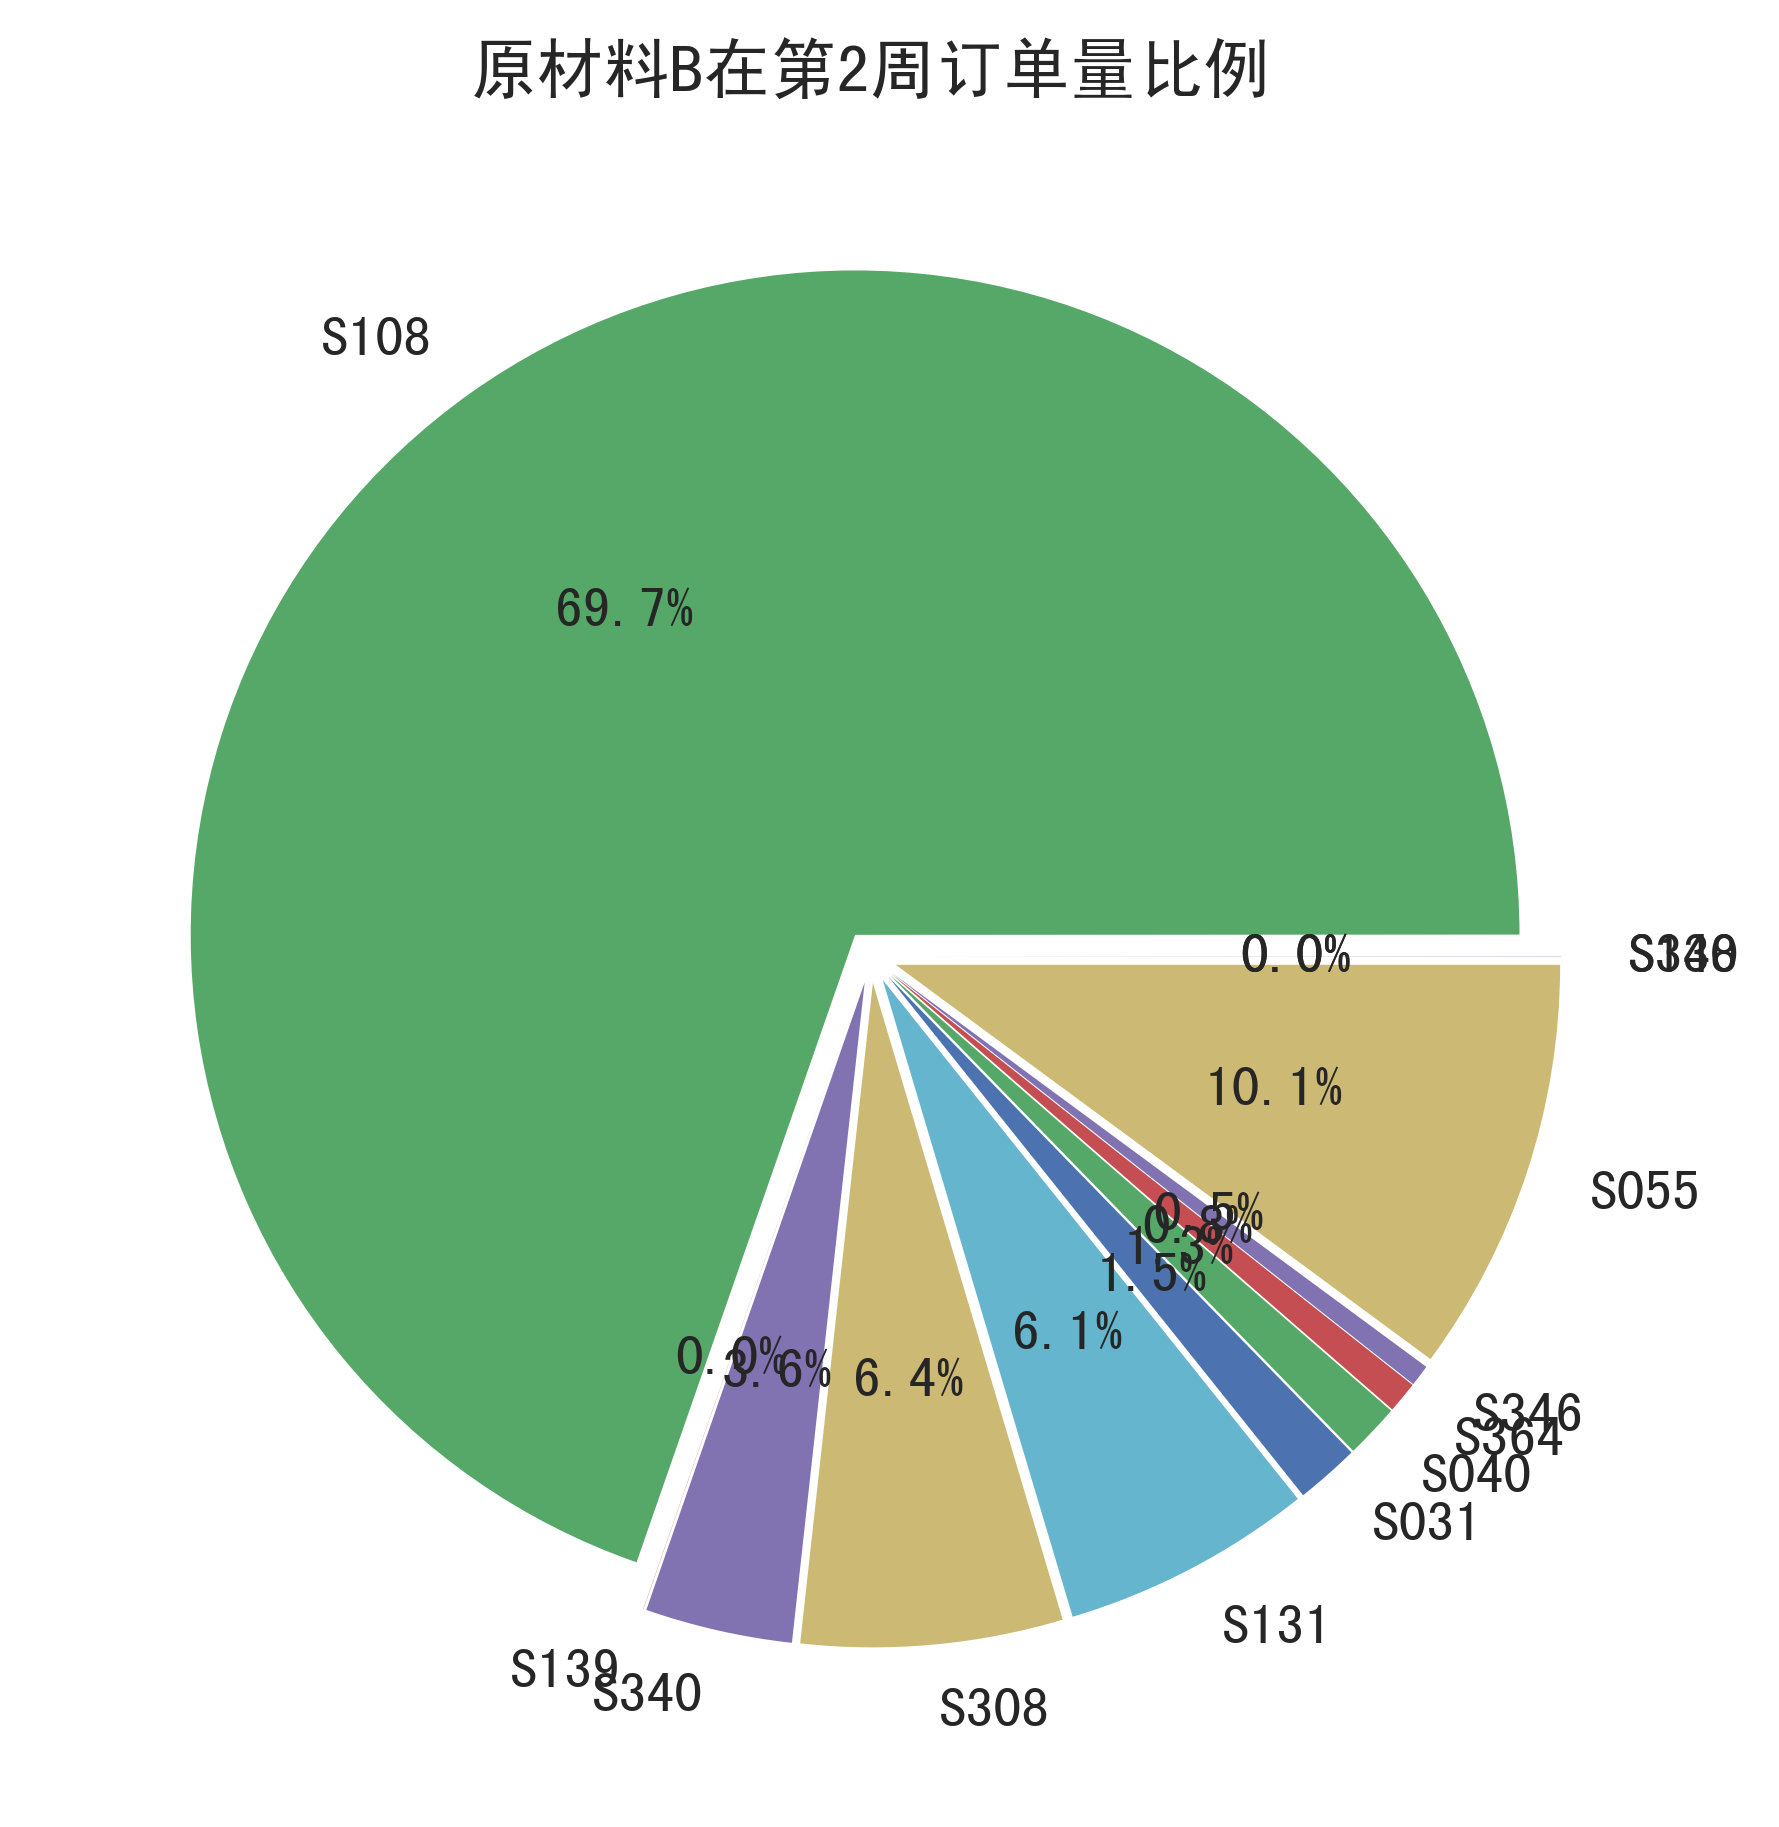

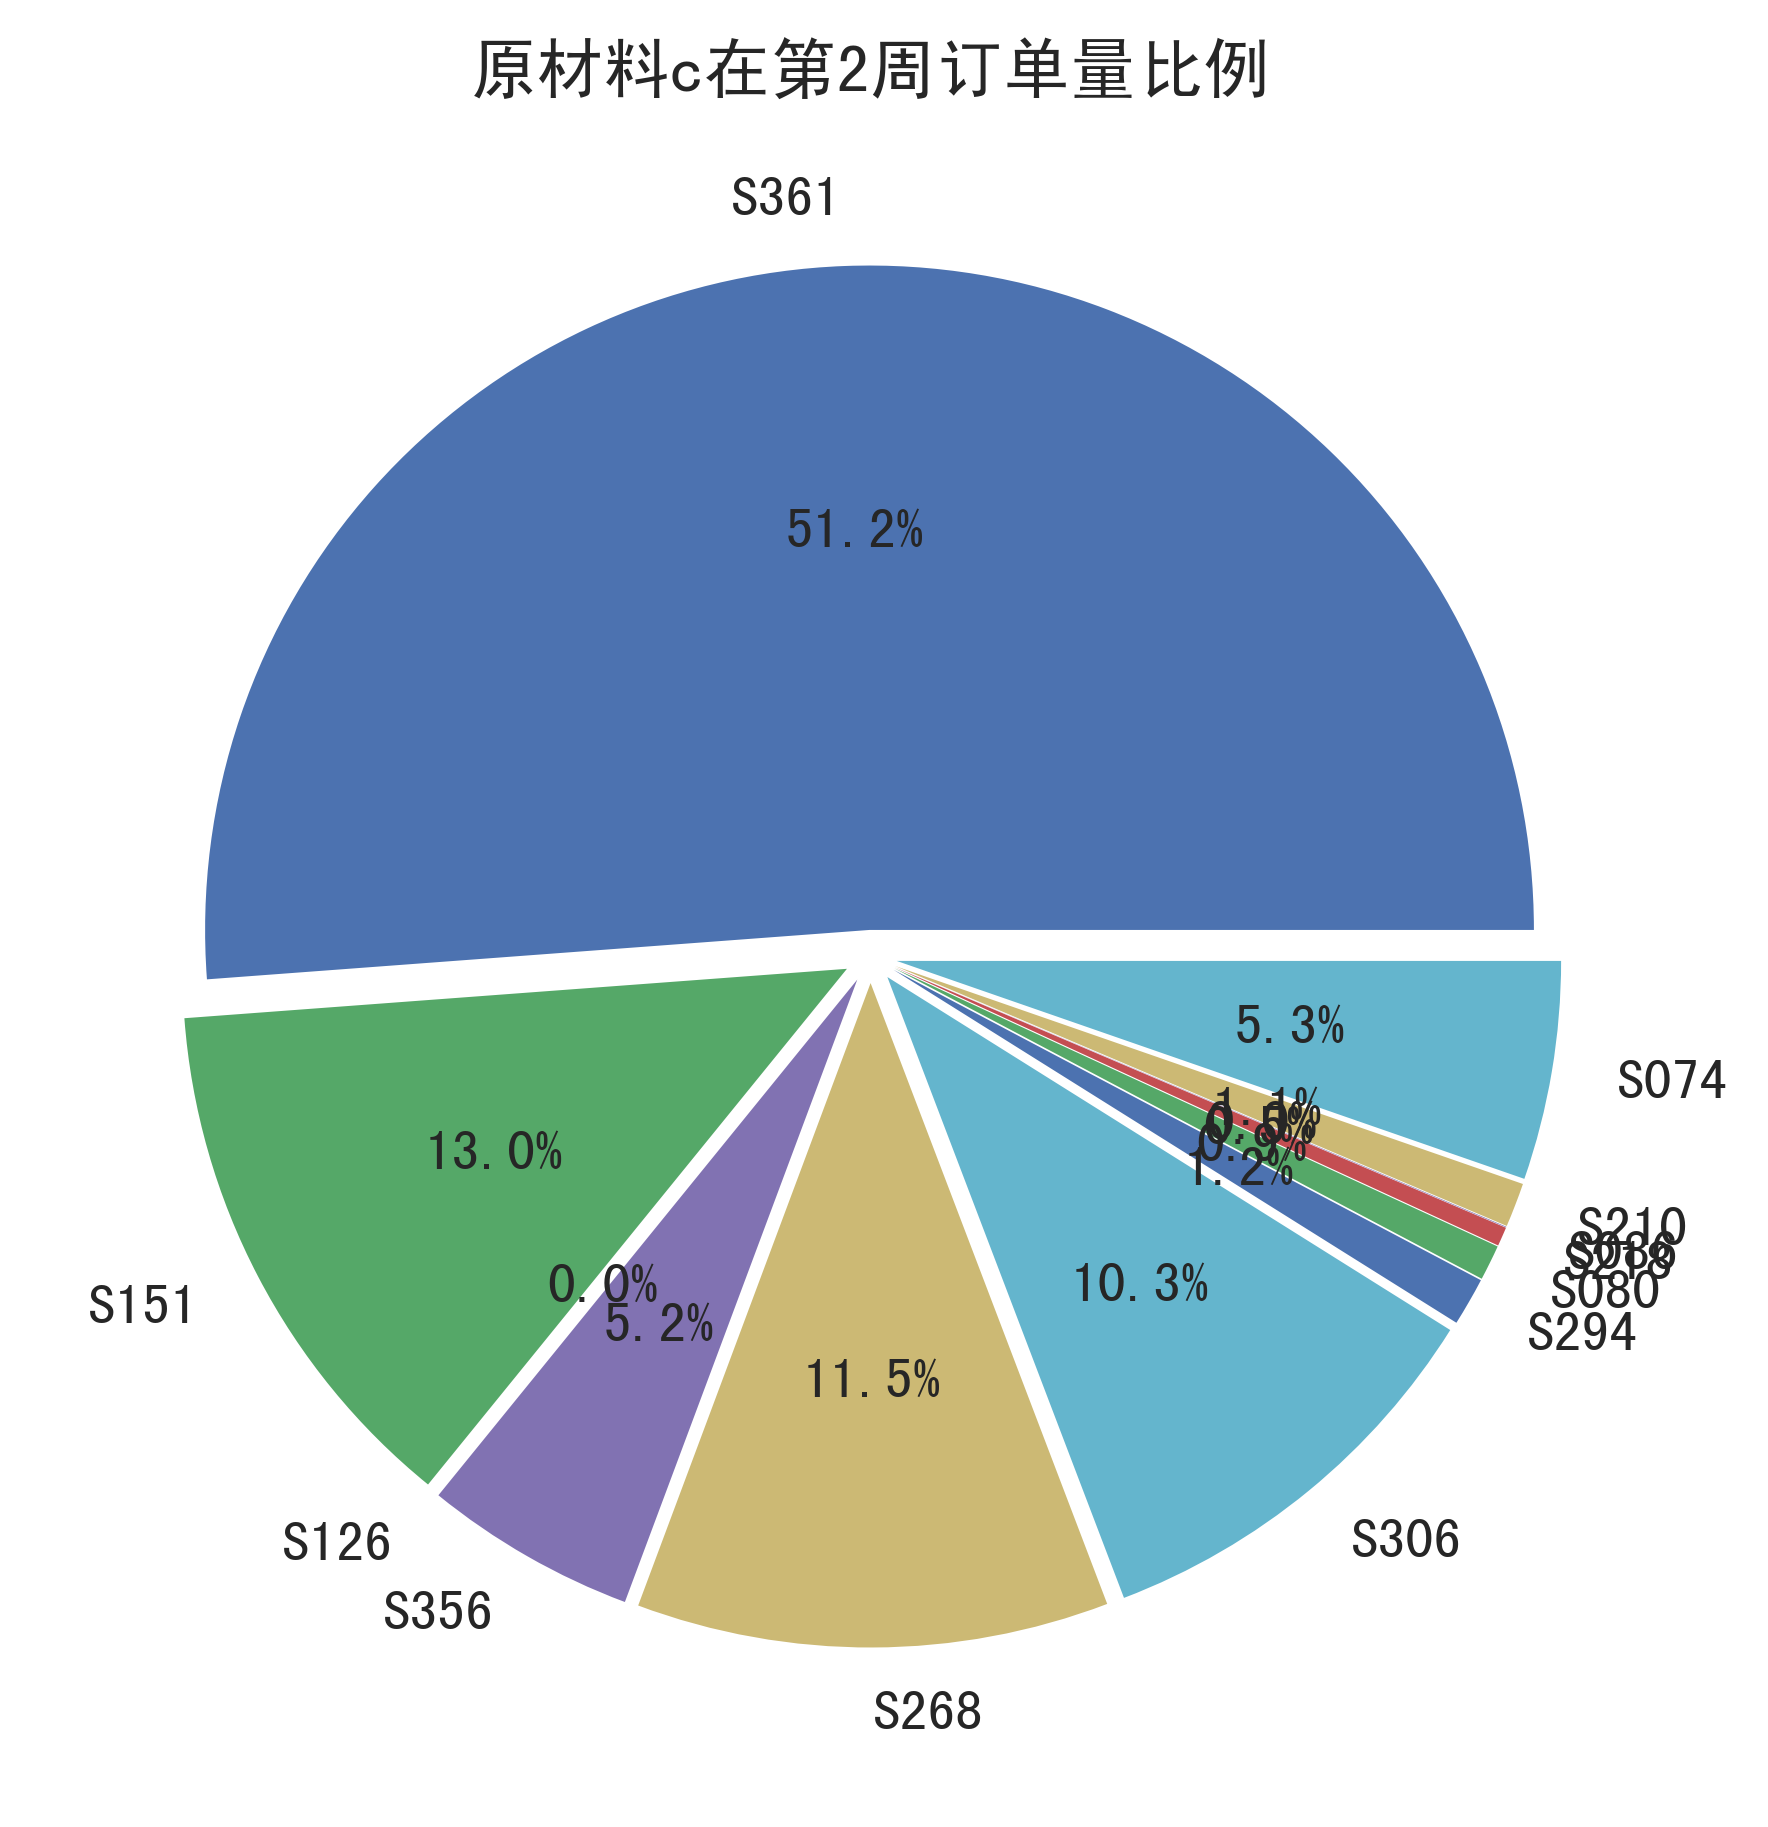

=========== Week 3 ===============


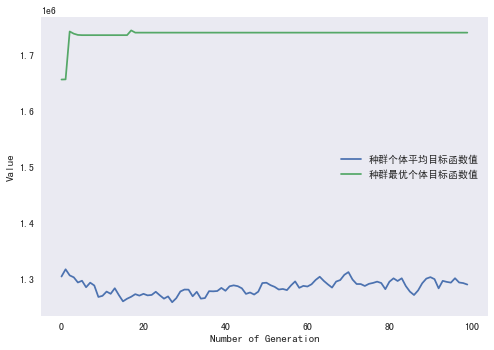

最优解的目标函数值：  1743260.2460180738
库存总量： 28406.34561063437
预备产能： 42739.448576933384
该周产能： 15473.342697415264
用时： 32.39592957496643 s
原材料A在第3周订单量总额4974 
  原材料B在第3周订单量总额20002 
  原材料C在第3周订单量总额7922 
  
  原材料第3周订单量总额：32898


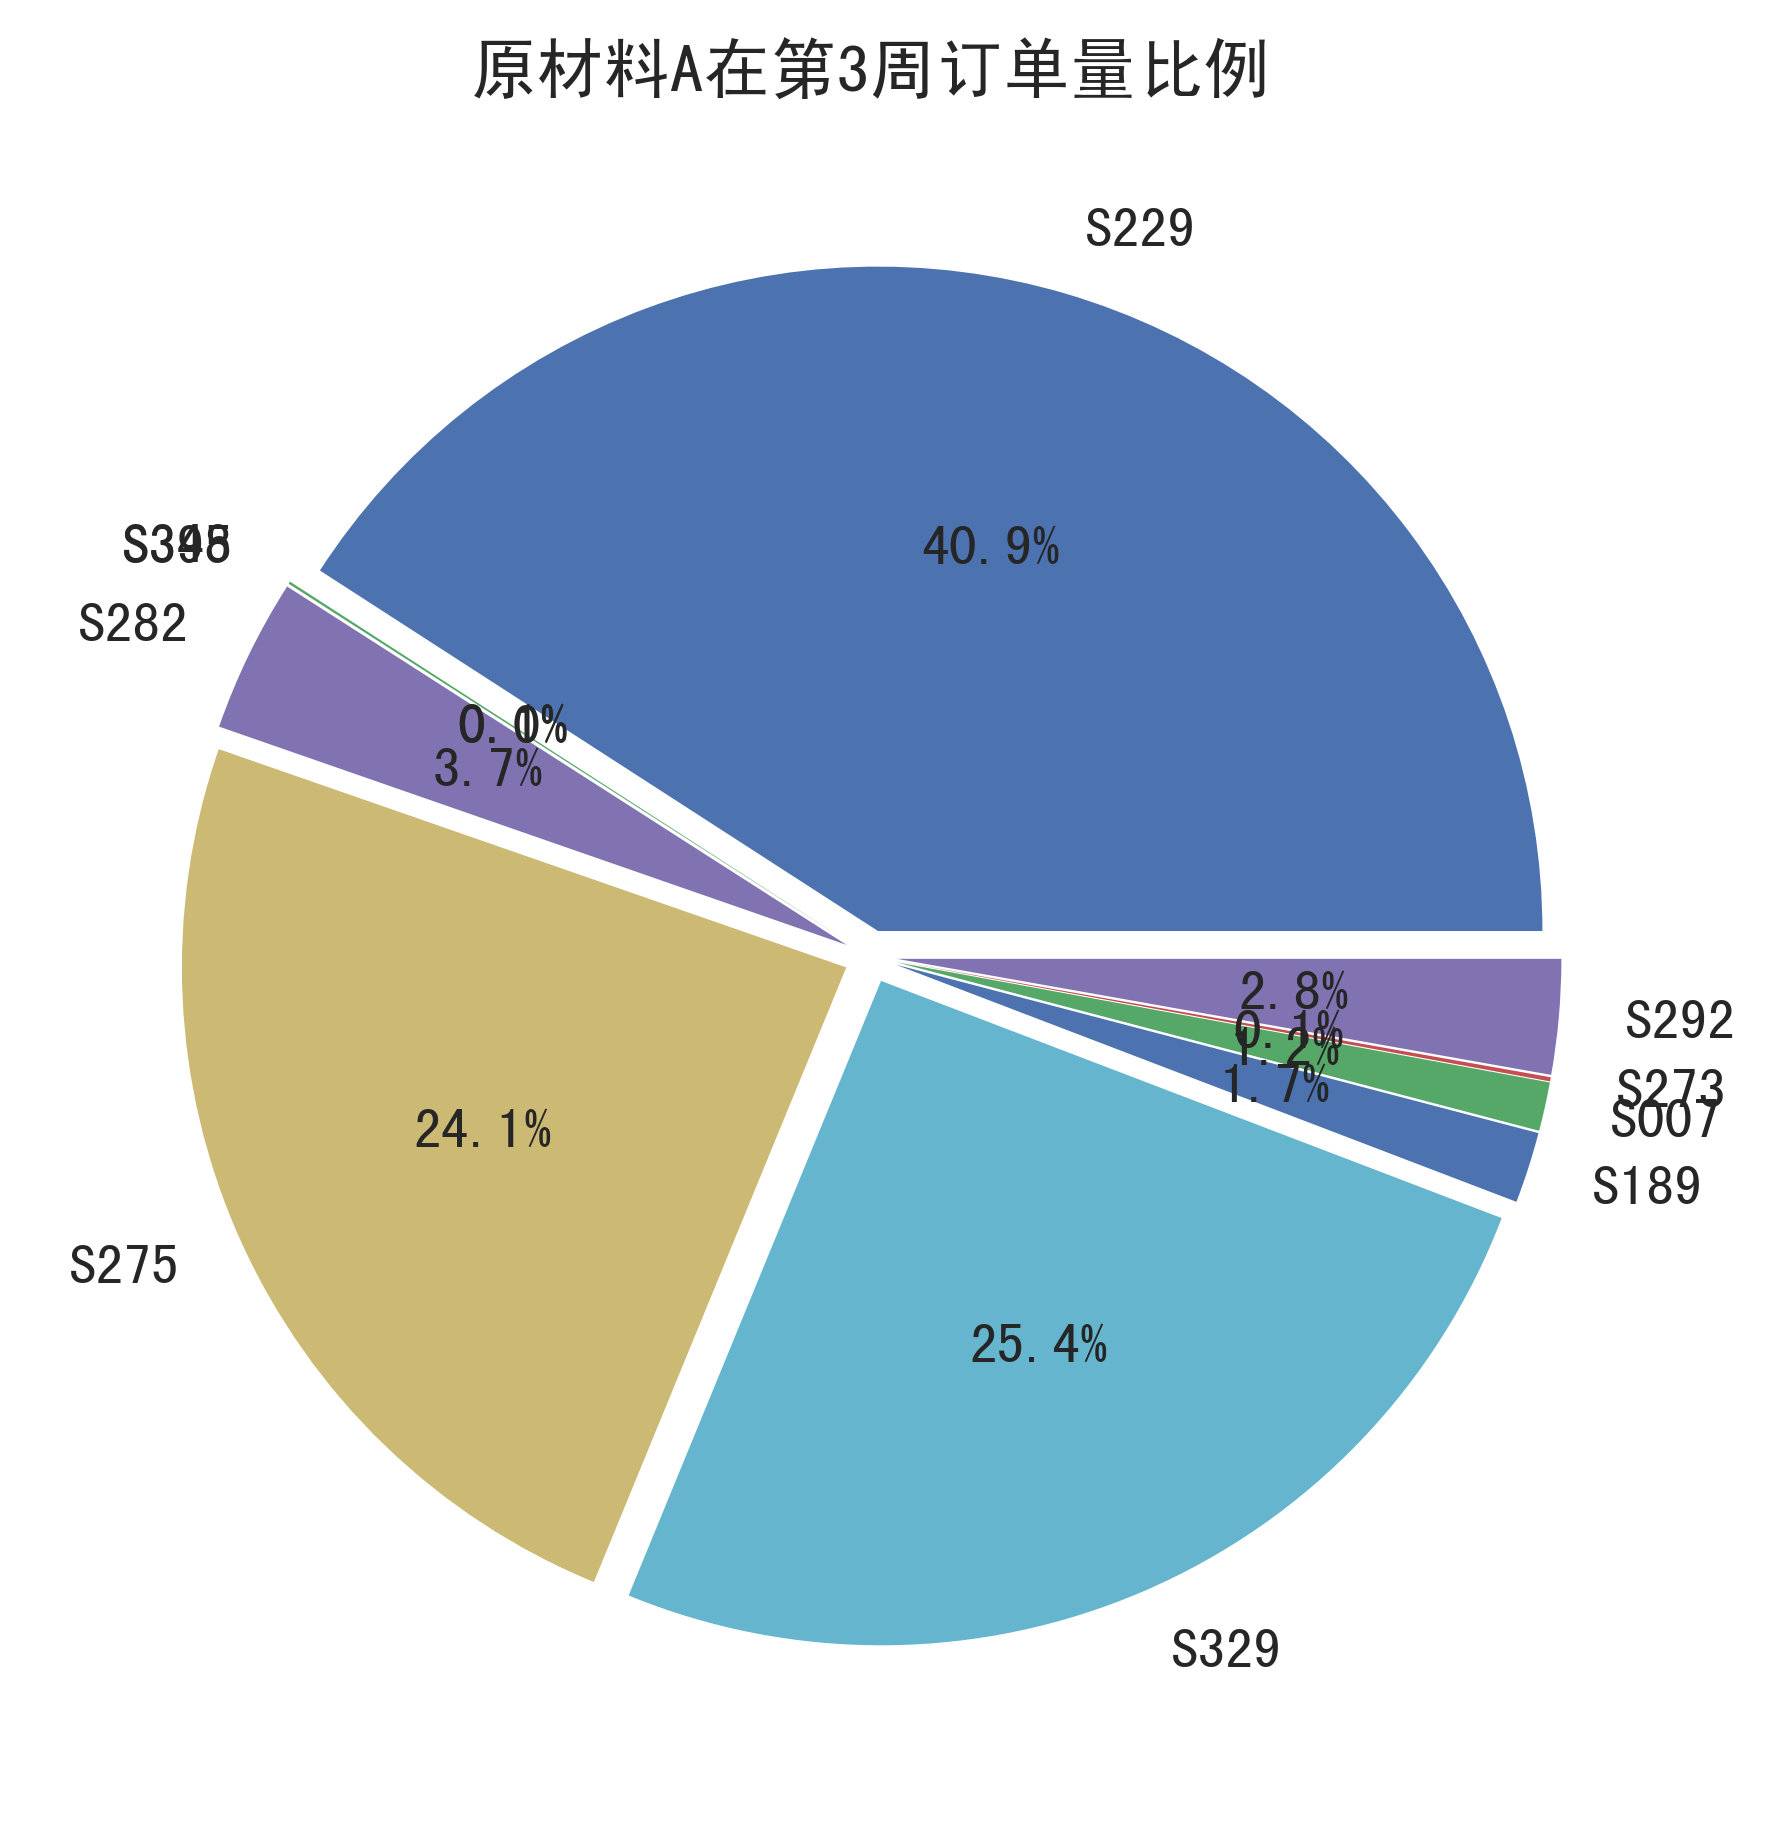

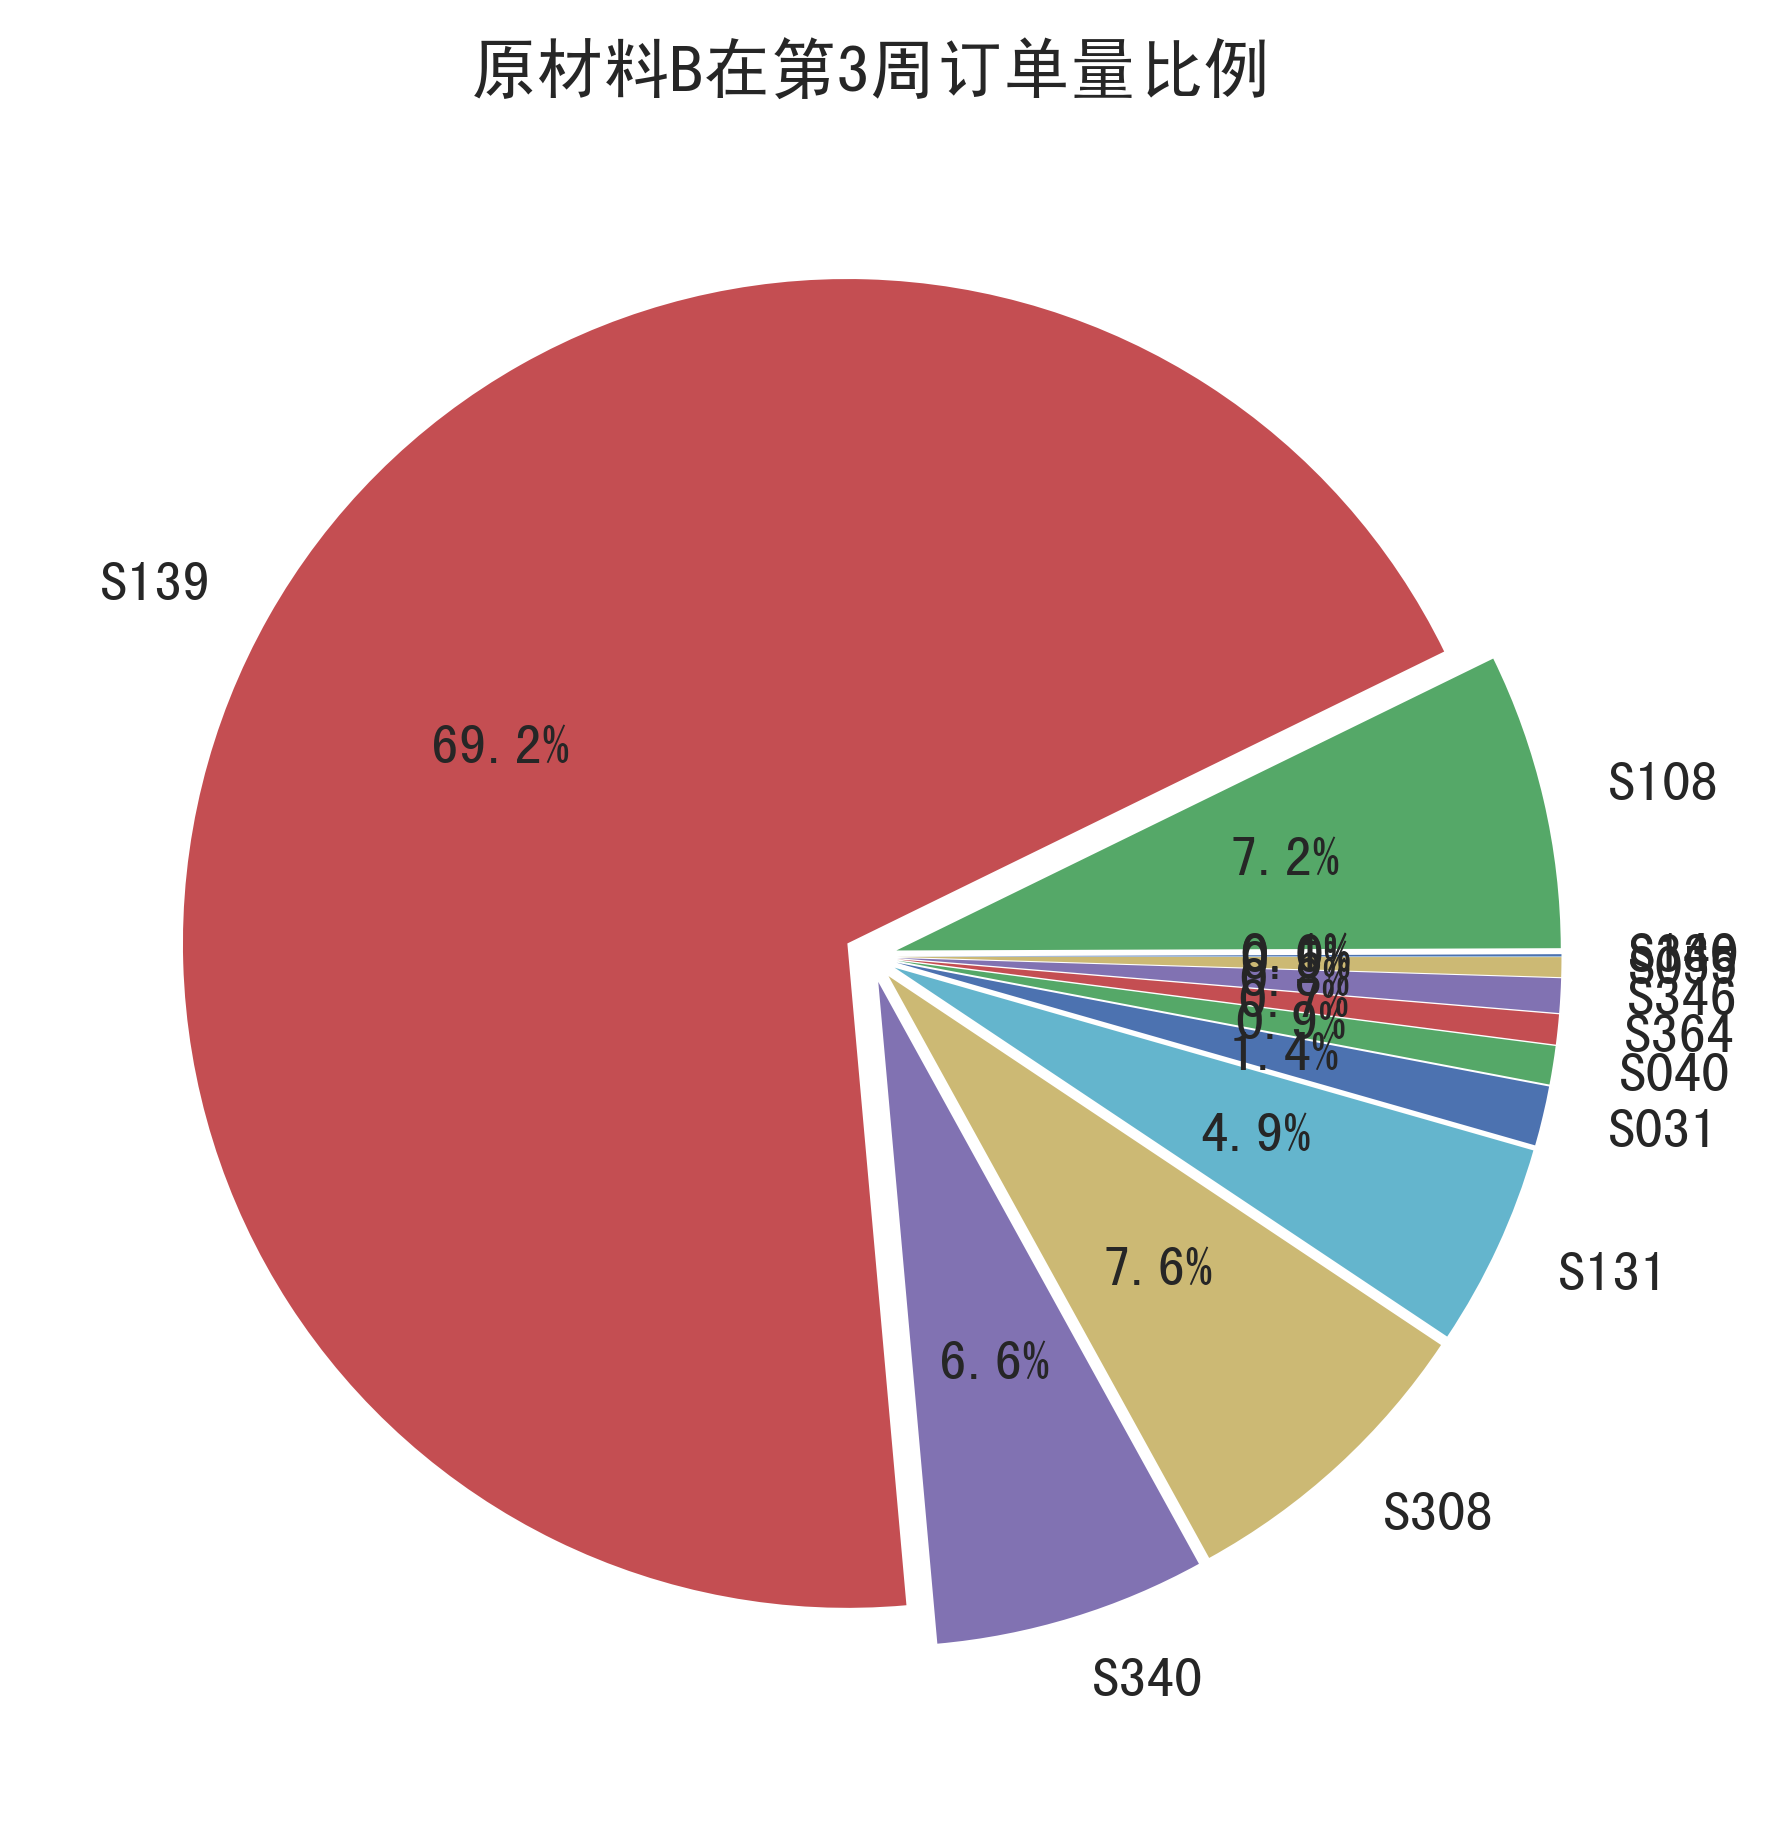

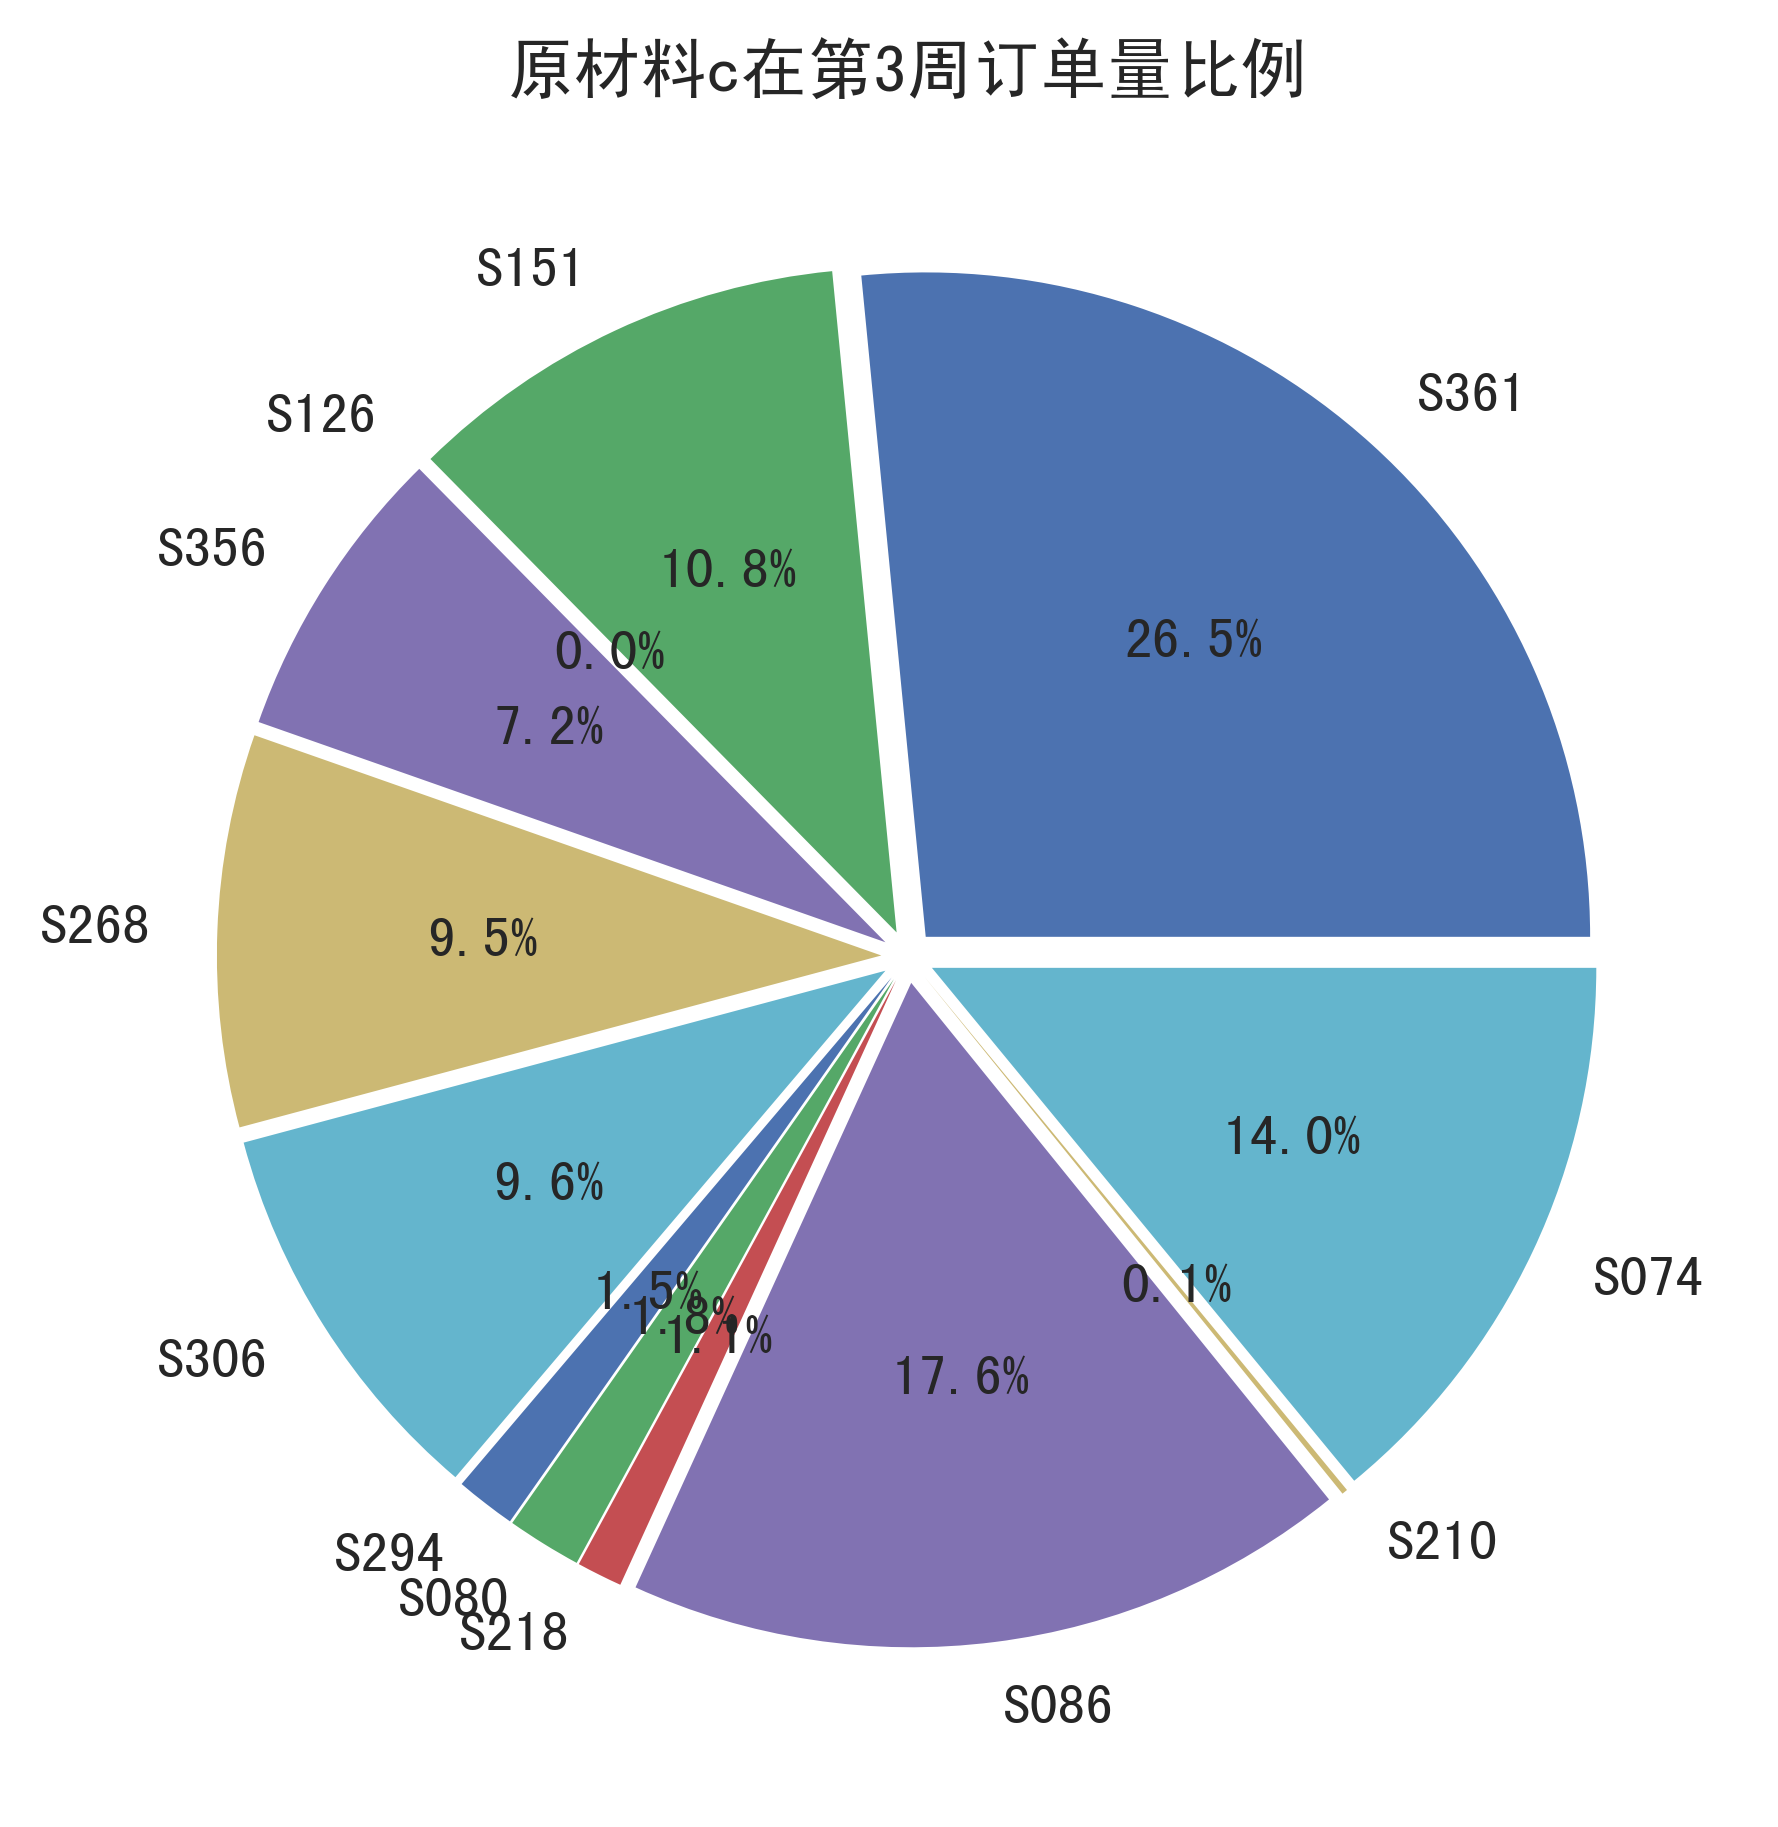

=========== Week 4 ===============


KeyboardInterrupt: ignored

In [65]:
##########运用遗传算法求解##########
def pred_Nweeks(N=24):
  global V_a_list, V_b_list, V_c_list
  global V_tol_list, O_prepare_list
  global x_a_pred_list, x_b_pred_list, x_c_pred_list
  global df_A_all, df_B_all, df_C_all
  global x_A_all, x_B_all, x_C_all

  NIND = 1000 # 种群个体数目

  V_a_init = np.tile(np.array(0.94 * 1e4), NIND) * 2
  V_b_init = np.tile(np.array(0.94 * 1e4), NIND) * 2
  V_c_init = np.tile(np.array(0.94 * 1e4), NIND) * 2
  V_a_list, V_b_list, V_c_list = [V_a_init], [V_b_init], [V_c_init]
  df_A_all = pd.DataFrame([[]] * len(select_A_ID), index=select_A_ID).T
  df_B_all = pd.DataFrame([[]] * len(select_B_ID), index=select_B_ID).T
  df_C_all = pd.DataFrame([[]] * len(select_C_ID), index=select_C_ID).T

  x_A_all = pd.DataFrame([[]] * len(select_A_ID), index=select_A_ID).T
  x_B_all = pd.DataFrame([[]] * len(select_B_ID), index=select_B_ID).T
  x_C_all = pd.DataFrame([[]] * len(select_C_ID), index=select_C_ID).T
  V_tol_list, O_prepare_list = [], []
  x_a_pred_list, x_b_pred_list, x_c_pred_list = [], [], []
  for week_i in range(1, N + 1) :
    print(f'=========== Week {week_i} ===============')
    variable = run_algorithm(week_i)
    plot_pie(week_i, variable)

  return [df_A_all, df_B_all, df_C_all, x_a_pred_list,x_b_pred_list, x_c_pred_list,
V_tol_list, O_prepare_list]

NIND = 1000 # 种群个体数目
df_A_all, df_B_all, df_C_all, x_a_pred_list, x_b_pred_list, x_c_pred_list, V_tol_list,O_prepare_list = None,None,None,None,None,None,None,None

df_A_all, df_B_all, df_C_all, x_a_pred_list, x_b_pred_list, x_c_pred_list, V_tol_list,
O_prepare_list = pred_Nweeks(N=24)